<a href="https://colab.research.google.com/github/BenRyan-8/APA_CA/blob/main/BERPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install openpyxl

In [3]:
import pandas as pd
import openpyxl

df = pd.read_excel('/content/drive/MyDrive/FourthYear/APA/BERPublicsearch.xlsx', nrows=100000)
df_copy=df.copy()

In [4]:
#for starting again
df=df_copy

In [5]:
df.columns.tolist()

['CountyName',
 'DwellingTypeDescr',
 'Year_of_Construction',
 'TypeofRating',
 'EnergyRating',
 'BerRating',
 'GroundFloorArea(sq m)',
 'UValueWall',
 'UValueRoof',
 'UValueFloor',
 'UValueWindow',
 'UvalueDoor',
 'WallArea',
 'RoofArea',
 'FloorArea',
 'WindowArea',
 'DoorArea',
 'NoStoreys',
 'CO2Rating',
 'MainSpaceHeatingFuel',
 'MainWaterHeatingFuel',
 'HSMainSystemEfficiency',
 'MultiDwellingMPRN',
 'TGDLEdition',
 'MPCDERValue',
 'HSEffAdjFactor',
 'HSSupplHeatFraction',
 'HSSupplSystemEff',
 'WHMainSystemEff',
 'WHEffAdjFactor',
 'SupplSHFuel',
 'SupplWHFuel',
 'SHRenewableResources',
 'WHRenewableResources',
 'NoOfChimneys',
 'NoOfOpenFlues',
 'NoOfFansAndVents',
 'NoOfFluelessGasFires',
 'DraftLobby',
 'VentilationMethod',
 'FanPowerManuDeclaredValue',
 'HeatExchangerEff',
 'StructureType',
 'SuspendedWoodenFloor',
 'PercentageDraughtStripped',
 'NoOfSidesSheltered',
 'PermeabilityTest',
 'PermeabilityTestResult',
 'TempAdjustment',
 'HeatSystemControlCat',
 'HeatSystemRespo

#Data Cleaning

In [6]:
cols_to_remove = [

    # DIRECT BER COMPONENTS
    "BerRating",
    "CO2Rating",

    # DELIVERED ENERGY FIELDS
    "DeliveredLightingEnergy",
    "DeliveredEnergyPumpsFans",
    "DeliveredEnergyMainWater",
    "DeliveredEnergyMainSpace",
    "DeliveredEnergySecondarySpace",
    "DeliveredEnergySupplementaryWater",
    "TotalDeliveredEnergy",

    # PRIMARY ENERGY FIELDS
    "PrimaryEnergyLighting",
    "PrimaryEnergyPumpsFans",
    "PrimaryEnergyMainWater",
    "PrimaryEnergyMainSpace",
    "PrimaryEnergySecondarySpace",
    "PrimaryEnergySupplementaryWater",

    # CO2 EMISSIONS FIELDS
    "CO2Lighting",
    "CO2PumpsFans",
    "CO2MainWater",
    "CO2MainSpace",
    "CO2SecondarySpace",
    "CO2SupplementaryWater",

    # DEAP COMPLIANCE & PERFORMANCE COEFFICIENTS
    "CPC",
    "EPC",
    "RER",
    "RenewEPnren",
    "RenewEPren",

    # HIGHLY DERIVED / SEMI-LEAKAGE FIELDS
    "LivingAreaPercent",

    # RENEWABLE ENERGY SUBCOMPONENT FIELDS
    # Renewable Energy 1
    "FirstEnergyTypeId",
    "FirstEnergyType_Description",
    "FirstEnerProdComment",
    "FirstEnerProdDelivered",
    "FirstPartLTotalContribution",
    "FirstEnerProdConvFactor",
    "FirstEnerProdCO2EmissionFactor",
    "FirstEnerConsumedComment",
    "FirstEnerConsumedDelivered",
    "FirstEnerConsumedConvFactor",
    "FirstEnerConsumedCO2EmissionFactor",

    # Renewable Energy 2
    "SecondEnergyTypeId",
    "SecondEnergyType_Description",
    "SecondEnerProdComment",
    "SecondEnerProdDelivered",
    "SecondPartLTotalContribution",
    "SecondEnerProdConvFactor",
    "SecondEnerProdCO2EmissionFactor",
    "SecondEnerConsumedComment",
    "SecondEnerConsumedDelivered",
    "SecondEnerConsumedConvFactor",
    "SecondEnerConsumedCO2EmissionFactor",

    # Renewable Energy 3
    "ThirdEnergyTypeId",
    "ThirdEnergyType_Description",
    "ThirdEnerProdComment",
    "ThirdEnerProdDelivered",
    "ThirdPartLTotalContribution",
    "ThirdEnerProdConvFactor",
    "ThirdEnerProdCO2EmissionFactor",
    "ThirdEnerConsumedComment",
    "ThirdEnerConsumedDelivered",
    "ThirdEnerConsumedConvFactor",
    "ThirdEnerConsumedCO2EmissionFactor",

    # GROUP HEATING SCHEME FIELDS
    "ChargingBasisHeatConsumed",
    "gsdHSSupplHeatFraction",
    "gsdHSSupplSystemEff",
    "DistLossFactor",
    "CHPUnitHeatFraction",
    "CHPSystemType",
    "CHPElecEff",
    "CHPHeatEff",
    "CHPFuelType",
    "SupplHSFuelTypeID",
    "gsdSHRenewableResources",
    "gsdWHRenewableResources",
    "SolarHeatFraction",
    "TotalPrimaryEnergyFact",
    "TotalCO2Emissions",

    # WALL-BY-WALL STRUCTURE FIELDS

    # First wall (GA → GG)
    "FirstWallType_Description",
    "FirstWallDescription",
    "FirstWallArea",
    "FirstWallUValue",
    "FirstWallIsSemiExposed",
    "FirstWallAgeBandId",
    "FirstWallTypeId",

    # Second wall (GH → GN)
    "SecondWallType_Description",
    "SecondWallDescription",
    "SecondWallArea",
    "SecondWallUValue",
    "SecondWallIsSemiExposed",
    "SecondWallAgeBandId",
    "SecondWallTypeId",

    # Third wall (GO → GU)
    "ThirdWallType_Description",
    "ThirdWallDescription",
    "ThirdWallArea",
    "ThirdWallUValue",
    "ThirdWallIsSemiExposed",
    "ThirdWallAgeBandId",
    "ThirdWallTypeId",

    # MISCELLANEOUS STRUCTURAL FIELDS
    "GroundFloorUValue",
    "LowEnergyLightingPercent",
    "PurposeOfRating",
    "DateOfAssessment",
    "VolumeOfPreHeatStore",

    # SPATIAL METADATA
    "SA_Code",
    "prob_smarea_error_0corr",
    "prob_smarea_error_100corr",

    # NEW — DEAP-DERIVED HEATING / CONTROL VARIABLES (MUST REMOVE)
    "HSSupplSystemEff",
    "WHMainSystemEff",
    "WHEffAdjFactor",
    "TempAdjustment",
    "HeatSystemControlCat",
    "HeatSystemResponseCat",
    "TempFactorUnadj",
    "TempFactorMultiplier",
    "PrimaryCircuitLoss",
    "CombiBoilerAddLoss",
    "MPCDERValue"
]


In [7]:
df.drop(columns=cols_to_remove, inplace=True)

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the percentage of missing values for each column
missing_data = df.isnull().sum() / len(df) * 100

# Filter out columns with no missing data if desired, or sort for better visualization
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)


Heatmap overview of missing data

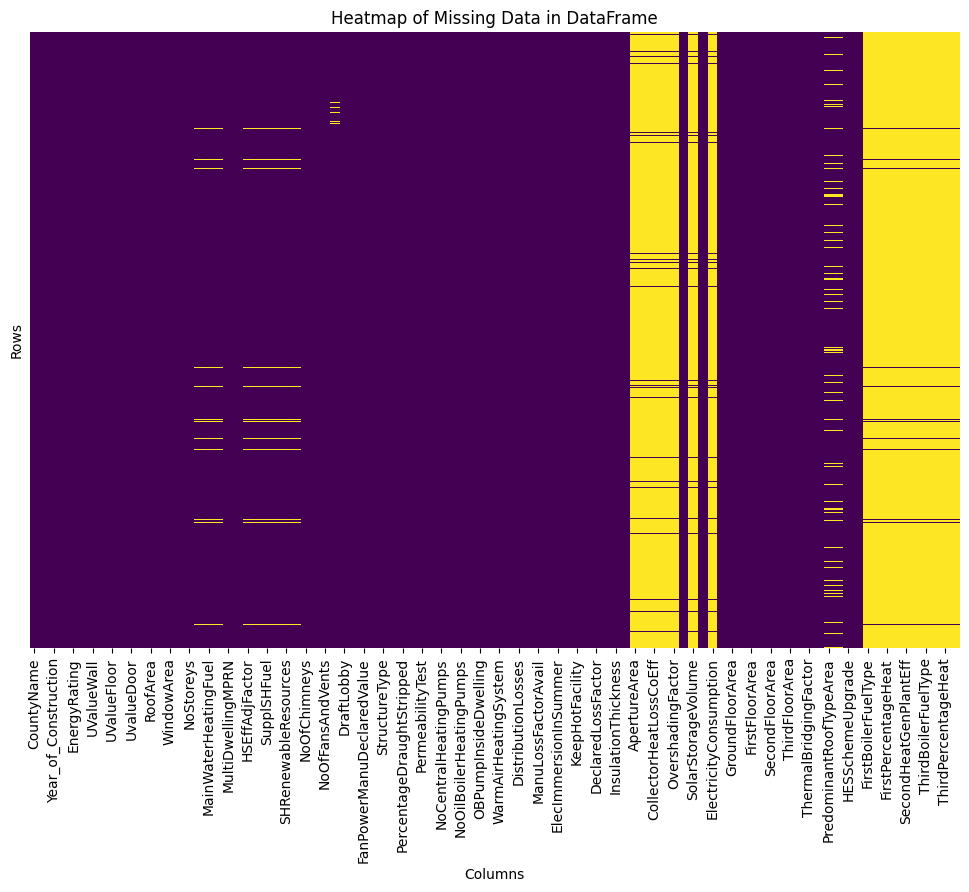

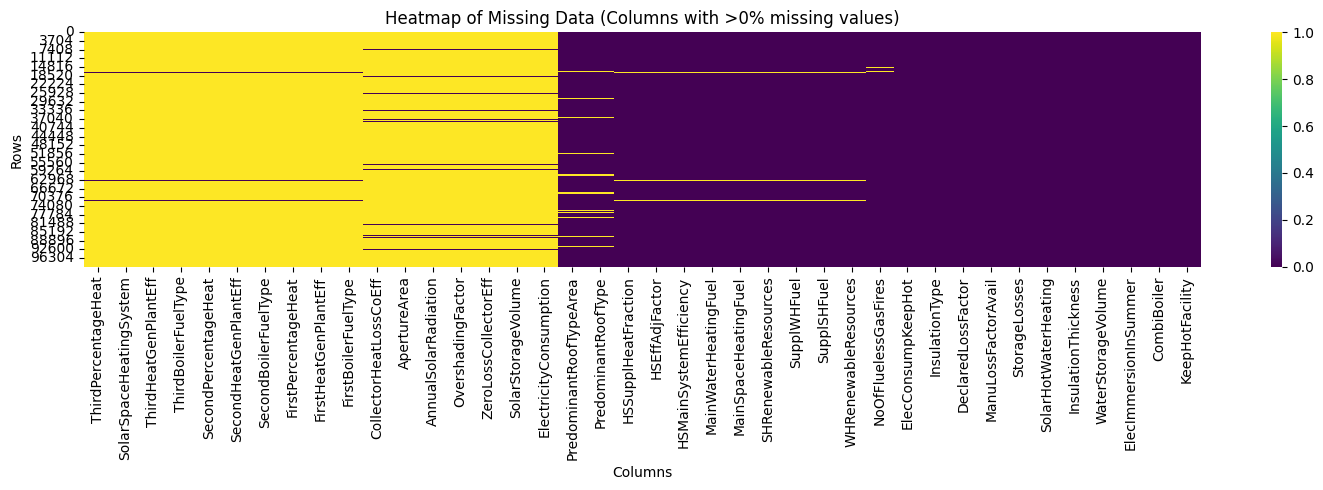

In [9]:
# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    df.isnull(),
    cbar=False,
    cmap='viridis',
    yticklabels=False # Hide yticklabels as it's hard to read for large DFs
)
plt.title('Heatmap of Missing Data in DataFrame')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

# A more detailed heatmap of only columns with missing values (if `missing_data` Series is not empty)
if not missing_data.empty:
    plt.figure(figsize=(15, 5))
    sns.heatmap(
        df[missing_data.index].isnull(),
        cbar=True,
        cmap='viridis'
    )
    plt.title('Heatmap of Missing Data (Columns with >0% missing values)')
    plt.xlabel('Columns')
    plt.ylabel('Rows')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
else:
    print("No columns with missing values to display a detailed heatmap.")


In [10]:
threshold = 0.9

# Identify columns with > 90% missing
cols_over_90_missing = df.columns[df.isna().mean() > threshold].tolist()

print("Columns with >90% missing:", cols_over_90_missing)
cols_over_90_missing

Columns with >90% missing: ['ApertureArea', 'ZeroLossCollectorEff', 'CollectorHeatLossCoEff', 'AnnualSolarRadiation', 'OvershadingFactor', 'SolarStorageVolume', 'ElectricityConsumption', 'FirstBoilerFuelType', 'FirstHeatGenPlantEff', 'FirstPercentageHeat', 'SecondBoilerFuelType', 'SecondHeatGenPlantEff', 'SecondPercentageHeat', 'ThirdBoilerFuelType', 'ThirdHeatGenPlantEff', 'ThirdPercentageHeat', 'SolarSpaceHeatingSystem']


['ApertureArea',
 'ZeroLossCollectorEff',
 'CollectorHeatLossCoEff',
 'AnnualSolarRadiation',
 'OvershadingFactor',
 'SolarStorageVolume',
 'ElectricityConsumption',
 'FirstBoilerFuelType',
 'FirstHeatGenPlantEff',
 'FirstPercentageHeat',
 'SecondBoilerFuelType',
 'SecondHeatGenPlantEff',
 'SecondPercentageHeat',
 'ThirdBoilerFuelType',
 'ThirdHeatGenPlantEff',
 'ThirdPercentageHeat',
 'SolarSpaceHeatingSystem']

In [11]:
# Filter the missing_data Series to include only columns identified as having >90% missing
missing_data_over_90 = missing_data[missing_data.index.isin(cols_over_90_missing)]

print("Columns with over 90% missing data and their percentages:")
display(missing_data_over_90.sort_values(ascending=False))


Columns with over 90% missing data and their percentages:


ThirdPercentageHeat        98.673
SolarSpaceHeatingSystem    98.673
ThirdHeatGenPlantEff       98.673
ThirdBoilerFuelType        98.673
SecondPercentageHeat       98.673
SecondHeatGenPlantEff      98.673
SecondBoilerFuelType       98.673
FirstPercentageHeat        98.673
FirstHeatGenPlantEff       98.673
FirstBoilerFuelType        98.673
CollectorHeatLossCoEff     94.663
ApertureArea               94.663
AnnualSolarRadiation       94.663
OvershadingFactor          94.663
ZeroLossCollectorEff       94.663
SolarStorageVolume         94.663
ElectricityConsumption     94.663
dtype: float64

In [12]:
# Drop them
df.drop(columns=cols_over_90_missing, inplace=True)

dropping columns that only contain one value as it doesn't provide any value to the model

In [13]:
cols_to_drop_single_value = []
for col in df.columns:
    if df[col].nunique() == 1:
        cols_to_drop_single_value.append(col)

if cols_to_drop_single_value:
    print(f"Dropping {len(cols_to_drop_single_value)} columns with only one unique value: {cols_to_drop_single_value}")
    df.drop(columns=cols_to_drop_single_value, inplace=True)
    print("Columns dropped successfully.")
else:
    print("No columns found with only one unique value.")

# Display the shape of the DataFrame after dropping columns
print(f"New DataFrame shape: {df.shape}")

No columns found with only one unique value.
New DataFrame shape: (100000, 79)


Checking for how rare the A ratings are and then grouping them into just A

In [14]:
df["EnergyRating"].value_counts().sort_index()


EnergyRating
A1        1
A2      213
A3     1794
B1     1307
B2     2244
B3     6288
C1    10671
C2    12950
C3    13023
D1    13279
D2    11855
E1     6928
E2     5477
F      5538
G      8432
Name: count, dtype: int64

In [15]:
df["EnergyRating"] = df["EnergyRating"].replace({"A1":"A", "A2":"A", "A3":"A"})

In [16]:
# Remove leading/trailing whitespace and uppercase just in case
df["EnergyRating"] = df["EnergyRating"].astype(str).str.strip().str.upper()


In [17]:
# Remove leading/trailing whitespace from all object (string) columns in the DataFrame
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype(str).str.strip()

print("Removed leading/trailing whitespace from all string columns in the DataFrame.")

Removed leading/trailing whitespace from all string columns in the DataFrame.


In [18]:
initial_rows = df.shape[0]
df.drop_duplicates(inplace=True)
final_rows = df.shape[0]

print(f"Number of duplicate rows dropped: {initial_rows - final_rows}")

Number of duplicate rows dropped: 2579


#Imputation

In [19]:
import numpy as np

# Identify column types automatically
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()

In [20]:
numeric_cols, categorical_cols

(['Year_of_Construction',
  'GroundFloorArea(sq m)',
  'UValueWall',
  'UValueRoof',
  'UValueFloor',
  'UValueWindow',
  'UvalueDoor',
  'WallArea',
  'RoofArea',
  'FloorArea',
  'WindowArea',
  'DoorArea',
  'NoStoreys',
  'HSMainSystemEfficiency',
  'TGDLEdition',
  'HSEffAdjFactor',
  'HSSupplHeatFraction',
  'SupplSHFuel',
  'SupplWHFuel',
  'SHRenewableResources',
  'WHRenewableResources',
  'NoOfChimneys',
  'NoOfOpenFlues',
  'NoOfFansAndVents',
  'NoOfFluelessGasFires',
  'FanPowerManuDeclaredValue',
  'HeatExchangerEff',
  'PercentageDraughtStripped',
  'NoOfSidesSheltered',
  'PermeabilityTestResult',
  'NoCentralHeatingPumps',
  'NoOilBoilerHeatingPumps',
  'NoGasBoilerHeatingPumps',
  'DistributionLosses',
  'WaterStorageVolume',
  'DeclaredLossFactor',
  'InsulationThickness',
  'ElecConsumpKeepHot',
  'GroundFloorArea',
  'GroundFloorHeight',
  'FirstFloorArea',
  'FirstFloorHeight',
  'SecondFloorArea',
  'SecondFloorHeight',
  'ThirdFloorArea',
  'ThirdFloorHeight',
 

##Numerical Imputation

In [21]:

numerical_but_categorical = [
    "TGDLEdition",
    "ThermalMassCategory",
    "PredominantRoofType",
    'SupplSHFuel',
    'SupplWHFuel',
    'SHRenewableResources',
    'WHRenewableResources',
    'HESSchemeUpgrade'
]

# Move overrides into categorical
for col in numerical_but_categorical:
    if col in numeric_cols:
        numeric_cols.remove(col)
    if col not in categorical_cols:
        categorical_cols.append(col)

df[numerical_but_categorical] = df[numerical_but_categorical].astype("str")


In [22]:
zero_counts = {}
# Filter for numerical columns
numeric_df = df.select_dtypes(include=['number'])

for col in numeric_df.columns:
    count = (numeric_df[col] == 0).sum()
    if count > 0:
        zero_counts[col] = count

if zero_counts:
    print("Number of 0's contained in each numerical column:")
    for col, count in zero_counts.items():
        print(f"Column '{col}': {count} zeros")
else:
    print("No numerical columns contain the value 0.")

Number of 0's contained in each numerical column:
Column 'UValueWall': 14 zeros
Column 'UValueRoof': 8892 zeros
Column 'UValueFloor': 10035 zeros
Column 'UValueWindow': 21 zeros
Column 'UvalueDoor': 11112 zeros
Column 'WallArea': 14 zeros
Column 'RoofArea': 8891 zeros
Column 'FloorArea': 10034 zeros
Column 'WindowArea': 21 zeros
Column 'DoorArea': 11116 zeros
Column 'HSSupplHeatFraction': 12840 zeros
Column 'NoOfChimneys': 39096 zeros
Column 'NoOfOpenFlues': 65324 zeros
Column 'NoOfFansAndVents': 14204 zeros
Column 'NoOfFluelessGasFires': 95732 zeros
Column 'FanPowerManuDeclaredValue': 96153 zeros
Column 'HeatExchangerEff': 96161 zeros
Column 'PercentageDraughtStripped': 4045 zeros
Column 'NoOfSidesSheltered': 6077 zeros
Column 'PermeabilityTestResult': 94507 zeros
Column 'NoCentralHeatingPumps': 14815 zeros
Column 'NoOilBoilerHeatingPumps': 59154 zeros
Column 'NoGasBoilerHeatingPumps': 60499 zeros
Column 'DistributionLosses': 2894 zeros
Column 'WaterStorageVolume': 4933 zeros
Column '

In [23]:
total_rows = len(df)

# Filter for columns that have more than 90% zeros
zero_percentage_threshold = 0.9

cols_with_high_zeros = {}
for col, count in zero_counts.items():
    percentage = count / total_rows
    if percentage > zero_percentage_threshold:
        cols_with_high_zeros[col] = percentage

if cols_with_high_zeros:
    print(f"Columns with more than {zero_percentage_threshold * 100}% zeros:")
    for col, percentage in cols_with_high_zeros.items():
        print(f"- Column '{col}': {percentage:.2%} zeros")
else:
    print(f"No numerical columns found with more than {zero_percentage_threshold * 100}% zeros.")

Columns with more than 90.0% zeros:
- Column 'NoOfFluelessGasFires': 98.27% zeros
- Column 'FanPowerManuDeclaredValue': 98.70% zeros
- Column 'HeatExchangerEff': 98.71% zeros
- Column 'PermeabilityTestResult': 97.01% zeros
- Column 'DeclaredLossFactor': 96.92% zeros
- Column 'ElecConsumpKeepHot': 99.65% zeros
- Column 'SecondFloorArea': 95.42% zeros
- Column 'SecondFloorHeight': 95.43% zeros
- Column 'ThirdFloorArea': 98.04% zeros
- Column 'ThirdFloorHeight': 98.03% zeros
- Column 'RoomInRoofArea': 94.54% zeros


In [24]:
# Drop columns with more than 90% zeros
if cols_with_high_zeros:
    cols_to_drop_high_zeros = list(cols_with_high_zeros.keys())
    df.drop(columns=cols_to_drop_high_zeros, inplace=True)
    print(f"Dropped {len(cols_to_drop_high_zeros)} columns with >90% zeros: {cols_to_drop_high_zeros}")
else:
    print("No columns with >90% zeros to drop.")

print(f"New DataFrame shape: {df.shape}")

Dropped 11 columns with >90% zeros: ['NoOfFluelessGasFires', 'FanPowerManuDeclaredValue', 'HeatExchangerEff', 'PermeabilityTestResult', 'DeclaredLossFactor', 'ElecConsumpKeepHot', 'SecondFloorArea', 'SecondFloorHeight', 'ThirdFloorArea', 'ThirdFloorHeight', 'RoomInRoofArea']
New DataFrame shape: (97421, 68)


In [25]:
# Remove columns that were dropped due to high zero percentage from the numeric_cols list
numeric_cols = [col for col in numeric_cols if col not in cols_to_drop_high_zeros]
print("Updated numeric_cols:")
print(numeric_cols)

Updated numeric_cols:
['Year_of_Construction', 'GroundFloorArea(sq m)', 'UValueWall', 'UValueRoof', 'UValueFloor', 'UValueWindow', 'UvalueDoor', 'WallArea', 'RoofArea', 'FloorArea', 'WindowArea', 'DoorArea', 'NoStoreys', 'HSMainSystemEfficiency', 'HSEffAdjFactor', 'HSSupplHeatFraction', 'NoOfChimneys', 'NoOfOpenFlues', 'NoOfFansAndVents', 'PercentageDraughtStripped', 'NoOfSidesSheltered', 'NoCentralHeatingPumps', 'NoOilBoilerHeatingPumps', 'NoGasBoilerHeatingPumps', 'DistributionLosses', 'WaterStorageVolume', 'InsulationThickness', 'GroundFloorArea', 'GroundFloorHeight', 'FirstFloorArea', 'FirstFloorHeight', 'ThermalBridgingFactor', 'PredominantRoofTypeArea']


In [26]:
print("Columns subject to median imputation:")
print(numeric_cols)

print("\nMissing values in these columns before imputation:")
print(df[numeric_cols].isnull().sum())

Columns subject to median imputation:
['Year_of_Construction', 'GroundFloorArea(sq m)', 'UValueWall', 'UValueRoof', 'UValueFloor', 'UValueWindow', 'UvalueDoor', 'WallArea', 'RoofArea', 'FloorArea', 'WindowArea', 'DoorArea', 'NoStoreys', 'HSMainSystemEfficiency', 'HSEffAdjFactor', 'HSSupplHeatFraction', 'NoOfChimneys', 'NoOfOpenFlues', 'NoOfFansAndVents', 'PercentageDraughtStripped', 'NoOfSidesSheltered', 'NoCentralHeatingPumps', 'NoOilBoilerHeatingPumps', 'NoGasBoilerHeatingPumps', 'DistributionLosses', 'WaterStorageVolume', 'InsulationThickness', 'GroundFloorArea', 'GroundFloorHeight', 'FirstFloorArea', 'FirstFloorHeight', 'ThermalBridgingFactor', 'PredominantRoofTypeArea']

Missing values in these columns before imputation:
Year_of_Construction            0
GroundFloorArea(sq m)           0
UValueWall                      0
UValueRoof                      0
UValueFloor                     0
UValueWindow                    0
UvalueDoor                      0
WallArea                  

Descriptive Statistics for PredominantRoofTypeArea:
count    88530.000000
mean        61.870798
std         36.822033
min          0.010000
25%         40.010000
50%         50.300000
75%         73.780000
max        820.000000
Name: PredominantRoofTypeArea, dtype: float64


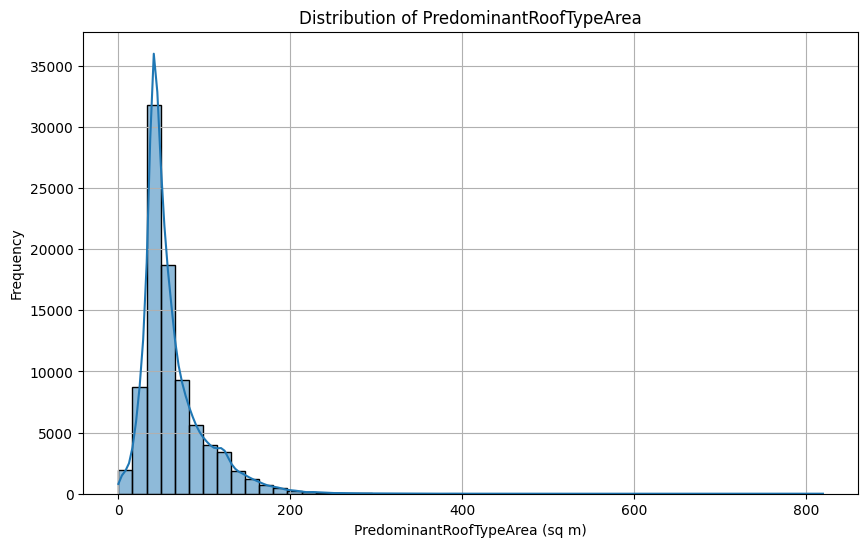

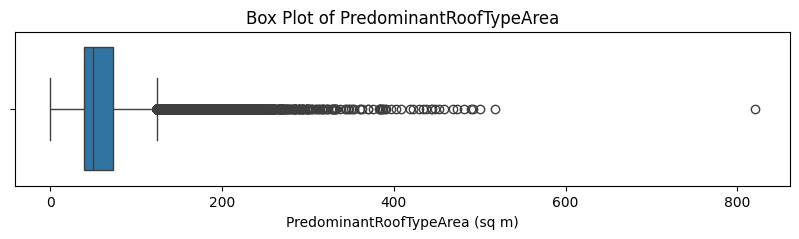

In [27]:
# Get the 'PredominantRoofTypeArea' column from the DataFrame
roof_area = df['PredominantRoofTypeArea']

# Display descriptive statistics
print("Descriptive Statistics for PredominantRoofTypeArea:")
print(roof_area.describe())

# Plotting the distribution
plt.figure(figsize=(10, 6))
sns.histplot(roof_area, kde=True, bins=50)
plt.title('Distribution of PredominantRoofTypeArea')
plt.xlabel('PredominantRoofTypeArea (sq m)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Optionally, a box plot to see outliers and quartiles more clearly
plt.figure(figsize=(10, 2))
sns.boxplot(x=roof_area)
plt.title('Box Plot of PredominantRoofTypeArea')
plt.xlabel('PredominantRoofTypeArea (sq m)')
plt.show()

In [28]:
from sklearn.impute import SimpleImputer

median_imputer = SimpleImputer(strategy="median")

df[numeric_cols] = median_imputer.fit_transform(df[numeric_cols])

##Categorical Imputation

In [29]:
def inspect_no_none_usage(df, categorical_cols):
    results = []

    for col in categorical_cols:
        uniques = df[col].dropna().unique()

        uses_no = any(
            str(v).strip().lower() == "no" for v in uniques
        )
        uses_none = any(
            str(v).strip().lower() == "none" for v in uniques
        )

        if uses_no or uses_none:
            results.append({
                "column": col,
                "uses_No": uses_no,
                "uses_None": uses_none,
                "unique_values": uniques
            })

    return pd.DataFrame(results)

# Run it
usage_df = inspect_no_none_usage(df, categorical_cols)

usage_df


column  uses_No  uses_None  \
0              MultiDwellingMPRN     True      False   
1                     DraftLobby     True      False   
2           SuspendedWoodenFloor     True      False   
3               PermeabilityTest     True      False   
4   CHBoilerThermostatControlled     True      False   
5   OBBoilerThermostatControlled     True      False   
6           OBPumpInsideDwelling     True      False   
7           WarmAirHeatingSystem     True      False   
8             UndergroundHeating     True      False   
9                  StorageLosses     True      False   
10           ManuLossFactorAvail     True      False   
11          SolarHotWaterHeating     True      False   
12         ElecImmersionInSummer     True      False   
13                   CombiBoiler    False       True   
14               KeepHotFacility    False       True   
15                InsulationType    False       True   
16                  CylinderStat     True      False   
17              CombinedCylinder     True      False   
18           SWHPumpSolarPowered     True      False   

                                        unique_values  
0                                           [NO, YES]  
1                                           [NO, YES]  
2                  [No, Yes (Sealed), Yes (Unsealed)]  
3                                           [NO, YES]  
4                                           [YES, NO]  
5                                           [YES, NO]  
6                                           [NO, YES]  
7                                           [NO, YES]  
8                                           [NO, YES]  
9                                      [YES, NO, nan]  
10                                     [NO, YES, nan]  
11                                     [NO, YES, nan]  
12                                     [NO, YES, nan]  
13  [None, Instantaneous, without keep-ho, nan, St...  
14  [None, nan, keep-hot facility, controlled, kee...  
15       [Factory Insulated, None, Loose Jacket, nan]  
16                                          [NO, YES]  
17                                          [NO, YES]  
18                                          [NO, YES]

In [30]:
impute_no = []
impute_none = []
impute_unknown = []

for col in categorical_cols:
    uniques = df[col].dropna().unique()
    lower_uniques = [str(u).strip().lower() for u in uniques]

    uses_no = "no" in lower_uniques
    uses_none = "none" in lower_uniques

    if uses_no and not uses_none:
        impute_no.append(col)
    elif uses_none and not uses_no:
        impute_none.append(col)
    else:
        impute_unknown.append(col)


In [31]:
impute_no, impute_none, impute_unknown

(['MultiDwellingMPRN',
  'DraftLobby',
  'SuspendedWoodenFloor',
  'PermeabilityTest',
  'CHBoilerThermostatControlled',
  'OBBoilerThermostatControlled',
  'OBPumpInsideDwelling',
  'WarmAirHeatingSystem',
  'UndergroundHeating',
  'StorageLosses',
  'ManuLossFactorAvail',
  'SolarHotWaterHeating',
  'ElecImmersionInSummer',
  'CylinderStat',
  'CombinedCylinder',
  'SWHPumpSolarPowered'],
 ['CombiBoiler', 'KeepHotFacility', 'InsulationType'],
 ['CountyName',
  'DwellingTypeDescr',
  'TypeofRating',
  'EnergyRating',
  'MainSpaceHeatingFuel',
  'MainWaterHeatingFuel',
  'VentilationMethod',
  'StructureType',
  'ThermalMassCategory',
  'PredominantRoofType',
  'TGDLEdition',
  'SupplSHFuel',
  'SupplWHFuel',
  'SHRenewableResources',
  'WHRenewableResources',
  'HESSchemeUpgrade'])

In [32]:
logical_zero_cols = [
    'HSSupplHeatFraction',
    'HSSupplSystemEff',
    'FanPowerManuDeclaredValue',
    'HeatExchangerEff'
]

for col in logical_zero_cols:
    if col in df.columns:
        df[col] = df[col].fillna(0)


In [33]:
df[impute_no] = df[impute_no].fillna("NO")
df[impute_none] = df[impute_none].fillna("None")
df[impute_unknown] = df[impute_unknown].fillna("Unknown")

Removing rows that don't contain an energy rating

In [34]:
original_len = len(df)
df = df[df["EnergyRating"] != "Unknown"]
new_len = len(df)

print(f"Removed {original_len - new_len} rows with unknown EnergyRating.")


Removed 0 rows with unknown EnergyRating.


In [35]:
df.isna().sum().sum()


np.int64(0)

In [36]:
df_clean = df.copy()
df_target = df["EnergyRating"]

In [37]:
df["CountyName"] = df["CountyName"].replace(
    to_replace=r".*Dublin.*",
    value="Co. Dublin",
    regex=True
)


In [38]:
tree_df = df.copy()
logreg_df = df.copy()

logreg_df.drop(columns=["EnergyRating"], inplace=True)

print("Tree-based dataset shape:", tree_df.shape)
tree_df.head()


Tree-based dataset shape: (97421, 68)


CountyName    DwellingTypeDescr  Year_of_Construction TypeofRating  \
0  Co. Wexford       Detached house                2000.0     Existing   
1  Galway City  Semi-detached house                1982.0     Existing   
2   Co. Galway  Top-floor apartment                2002.0     Existing   
4   Co. Galway  Top-floor apartment                2002.0     Existing   
5     Co. Cork  Semi-detached house                1977.0     Existing   

  EnergyRating  GroundFloorArea(sq m)  UValueWall  UValueRoof  UValueFloor  \
0           B3                 233.78        0.28        0.23         0.41   
1           C2                 108.58        0.27        0.13         0.57   
2           C3                  72.38        0.27        0.13         0.00   
4           D1                  60.30        0.27        0.13         0.00   
5           C3                 123.70        0.42        0.13         0.84   

   UValueWindow  ...  SWHPumpSolarPowered  GroundFloorArea  GroundFloorHeight  \
0          2.71  ...                   NO           136.49               2.15   
1          1.34  ...                   NO            54.29               2.40   
2          2.70  ...                   NO            72.38               2.50   
4          2.70  ...                   NO            60.30               2.45   
5          2.86  ...                   NO            60.59               2.47   

   FirstFloorArea  FirstFloorHeight  ThermalBridgingFactor  \
0           97.29              2.40                   0.15   
1           54.29              2.70                   0.15   
2            0.00              0.00                   0.15   
4            0.00              0.00                   0.15   
5           63.11              2.66                   0.15   

   ThermalMassCategory PredominantRoofTypeArea          PredominantRoofType  \
0               Medium                  87.456  Pitch Roof-Insul.on Ceiling   
1               Medium                  54.290  Pitch Roof-Insul.on Ceiling   
2           Medium-low                  72.380  Pitch Roof-Insul.on Ceiling   
4           Medium-low                  60.300  Pitch Roof-Insul.on Ceiling   
5               Medium                  63.110  Pitch Roof-Insul.on Ceiling   

   HESSchemeUpgrade  
0                 1  
1                 1  
2                 1  
4                 1  
5                 1  

[5 rows x 68 columns]

In [39]:
tree_df.columns.tolist()

['CountyName',
 'DwellingTypeDescr',
 'Year_of_Construction',
 'TypeofRating',
 'EnergyRating',
 'GroundFloorArea(sq m)',
 'UValueWall',
 'UValueRoof',
 'UValueFloor',
 'UValueWindow',
 'UvalueDoor',
 'WallArea',
 'RoofArea',
 'FloorArea',
 'WindowArea',
 'DoorArea',
 'NoStoreys',
 'MainSpaceHeatingFuel',
 'MainWaterHeatingFuel',
 'HSMainSystemEfficiency',
 'MultiDwellingMPRN',
 'TGDLEdition',
 'HSEffAdjFactor',
 'HSSupplHeatFraction',
 'SupplSHFuel',
 'SupplWHFuel',
 'SHRenewableResources',
 'WHRenewableResources',
 'NoOfChimneys',
 'NoOfOpenFlues',
 'NoOfFansAndVents',
 'DraftLobby',
 'VentilationMethod',
 'StructureType',
 'SuspendedWoodenFloor',
 'PercentageDraughtStripped',
 'NoOfSidesSheltered',
 'PermeabilityTest',
 'NoCentralHeatingPumps',
 'CHBoilerThermostatControlled',
 'NoOilBoilerHeatingPumps',
 'OBBoilerThermostatControlled',
 'OBPumpInsideDwelling',
 'NoGasBoilerHeatingPumps',
 'WarmAirHeatingSystem',
 'UndergroundHeating',
 'DistributionLosses',
 'StorageLosses',
 'Manu

#Encoding Categorical Features

In [40]:
#not binary
impute_no.remove("SuspendedWoodenFloor")


binary_cols = impute_no

literally just all the different categorical columns to be encoded.

*Still need to go through this and clean it up*

In [41]:
binary_cols = impute_no

fuel_cols = [
    "MainSpaceHeatingFuel",
    "MainWaterHeatingFuel",
    "SupplSHFuel",
    "SupplWHFuel",
    "SHRenewableResources",
    "WHRenewableResources",
]
dwelling_cols = [
    "DwellingTypeDescr",
    "StructureType"
]
ventilation_cols = ["VentilationMethod"]
categorical_code_cols = [
    "TGDLEdition",
    "ThermalMassCategory",
    "PredominantRoofType"
]
location_cols = ["CountyName"]
other_categoricals = impute_unknown
multi_category_cols = ["SuspendedWoodenFloor"]
extra_categoricals = ['CombiBoiler', 'KeepHotFacility', 'InsulationType']


In [42]:
categorical_to_onehot = (
    fuel_cols
    + dwelling_cols
    + ventilation_cols
    + categorical_code_cols
    + location_cols
    + multi_category_cols
    + extra_categoricals
    + [
        col for col in other_categoricals
        if col not in (
            fuel_cols + dwelling_cols + ventilation_cols +
            categorical_code_cols + location_cols + multi_category_cols
        )
    ]
)

categorical_to_onehot.remove("EnergyRating")


In [43]:
#Encoding binary fields
for col in binary_cols:
    logreg_df[col] = logreg_df[col].map({"Yes": 1, "No": 0})


In [44]:
#One-hot encoding all categoricals
logreg_df = pd.get_dummies(
    logreg_df,
    columns=categorical_to_onehot,
    drop_first=False
)

print("Logistic Regression dataset shape:", logreg_df.shape)
logreg_df.head()


Logistic Regression dataset shape: (97421, 203)


Year_of_Construction  GroundFloorArea(sq m)  UValueWall  UValueRoof  \
0                2000.0                 233.78        0.28        0.23   
1                1982.0                 108.58        0.27        0.13   
2                2002.0                  72.38        0.27        0.13   
4                2002.0                  60.30        0.27        0.13   
5                1977.0                 123.70        0.42        0.13   

   UValueFloor  UValueWindow  UvalueDoor  WallArea  RoofArea  FloorArea  ...  \
0         0.41          2.71        3.00    137.89    157.26     136.49  ...   
1         0.57          1.34        3.00     84.83     54.29      54.29  ...   
2         0.00          2.70        0.00     51.98     72.38       0.00  ...   
4         0.00          2.70        0.00     46.63     60.30       0.00  ...   
5         0.84          2.86        1.66    117.01     63.11      60.59  ...   

   KeepHotFacility_nan  InsulationType_Factory Insulated  \
0                False                              True   
1                False                              True   
2                False                              True   
4                False                              True   
5                False                              True   

   InsulationType_Loose Jacket  InsulationType_None  InsulationType_nan  \
0                        False                False               False   
1                        False                False               False   
2                        False                False               False   
4                        False                False               False   
5                        False                False               False   

   TypeofRating_Existing  TypeofRating_Final  TypeofRating_Provisional  \
0                   True               False                     False   
1                   True               False                     False   
2                   True               False                     False   
4                   True               False                     False   
5                   True               False                     False   

   HESSchemeUpgrade_0  HESSchemeUpgrade_1  
0               False                True  
1               False                True  
2               False                True  
4               False                True  
5               False                True  

[5 rows x 203 columns]

In [45]:
# ---- Drop zero-variance columns ----
zero_var_cols = [col for col in logreg_df.columns if logreg_df[col].nunique() <= 1]

if zero_var_cols:
    print(f"Dropping {len(zero_var_cols)} zero-variance columns:")
    print(zero_var_cols)
    logreg_df.drop(columns=zero_var_cols, inplace=True)
else:
    print("No zero-variance columns found.")

print("Logistic Regression dataset shape after cleanup:", logreg_df.shape)


Dropping 15 zero-variance columns:
['MultiDwellingMPRN', 'DraftLobby', 'PermeabilityTest', 'CHBoilerThermostatControlled', 'OBBoilerThermostatControlled', 'OBPumpInsideDwelling', 'WarmAirHeatingSystem', 'UndergroundHeating', 'StorageLosses', 'ManuLossFactorAvail', 'SolarHotWaterHeating', 'ElecImmersionInSummer', 'CylinderStat', 'CombinedCylinder', 'SWHPumpSolarPowered']
Logistic Regression dataset shape after cleanup: (97421, 188)


In [46]:
logreg_df.columns.tolist()

['Year_of_Construction',
 'GroundFloorArea(sq m)',
 'UValueWall',
 'UValueRoof',
 'UValueFloor',
 'UValueWindow',
 'UvalueDoor',
 'WallArea',
 'RoofArea',
 'FloorArea',
 'WindowArea',
 'DoorArea',
 'NoStoreys',
 'HSMainSystemEfficiency',
 'HSEffAdjFactor',
 'HSSupplHeatFraction',
 'NoOfChimneys',
 'NoOfOpenFlues',
 'NoOfFansAndVents',
 'PercentageDraughtStripped',
 'NoOfSidesSheltered',
 'NoCentralHeatingPumps',
 'NoOilBoilerHeatingPumps',
 'NoGasBoilerHeatingPumps',
 'DistributionLosses',
 'WaterStorageVolume',
 'InsulationThickness',
 'GroundFloorArea',
 'GroundFloorHeight',
 'FirstFloorArea',
 'FirstFloorHeight',
 'ThermalBridgingFactor',
 'PredominantRoofTypeArea',
 'MainSpaceHeatingFuel_Anthracite',
 'MainSpaceHeatingFuel_Bottled LPG',
 'MainSpaceHeatingFuel_Bulk LPG (propane or butane)',
 'MainSpaceHeatingFuel_Electricity',
 'MainSpaceHeatingFuel_Heating Oil',
 'MainSpaceHeatingFuel_House Coal',
 'MainSpaceHeatingFuel_Mains Gas',
 'MainSpaceHeatingFuel_Manufactured Smokeless Fuel

In [47]:
#Validating
print("Remaining object columns:", logreg_df.select_dtypes(include=["object"]).columns.tolist())


Remaining object columns: []


In [48]:
tree_df.isna().sum().sum() == 0


np.True_

#Preparing for modelling + 5 Baselines

In [49]:
rating_order = ['A','B1','B2','B3','C1','C2','C3','D1','D2','E1','E2','F','G']
rating_to_num = {label: idx for idx, label in enumerate(rating_order)}

# Tree-based target
tree_y = tree_df['EnergyRating'].map(rating_to_num)
tree_X = tree_df.drop(columns=["EnergyRating"])

# LogReg target
y_logreg = df_target.map(rating_to_num)


In [50]:
tree_train_idx = tree_df["CountyName"] != "Co. Dublin"
tree_test_idx  = tree_df["CountyName"] == "Co. Dublin"

X_tree_train = tree_X.loc[tree_train_idx]
X_tree_test  = tree_X.loc[tree_test_idx]
y_tree_train = tree_y.loc[tree_train_idx]
y_tree_test  = tree_y.loc[tree_test_idx]


In [51]:
logreg_train_idx = logreg_df["CountyName_Co. Dublin"] == 0
logreg_test_idx  = logreg_df["CountyName_Co. Dublin"] == 1

X_logreg_train = logreg_df.loc[logreg_train_idx]
X_logreg_test  = logreg_df.loc[logreg_test_idx]

y_logreg_train = y_logreg.loc[logreg_train_idx]
y_logreg_test  = y_logreg.loc[logreg_test_idx]


In [52]:
cat_features = X_tree_train.select_dtypes(include=["object"]).columns.tolist()


In [53]:
for col in cat_features:
    X_tree_train[col] = X_tree_train[col].astype("category")
    X_tree_test[col] = X_tree_test[col].astype("category")


/tmp/ipython-input-477680080.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_tree_train[col] = X_tree_train[col].astype("category")
/tmp/ipython-input-477680080.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_tree_test[col] = X_tree_test[col].astype("category")
/tmp/ipython-input-477680080.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

In [54]:
!pip install mord


  Preparing metadata (setup.py) ... done
  Created wheel for mord: filename=mord-0.7-py3-none-any.whl size=9885 sha256=73cdcb180e29a199fb8a4899b962ee68b240f470f4369dc39c3c36d10e045e09
  Stored in directory: /root/.cache/pip/wheels/80/3e/3b/13f1adf346cad0fec675db328e4b0d814795c6c8e2fb659122
Successfully built mord


In [55]:
import mord as m
from sklearn.metrics import cohen_kappa_score, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_logreg_train_scaled = scaler.fit_transform(X_logreg_train)
X_logreg_test_scaled  = scaler.transform(X_logreg_test)

##ordinal logistic regression (baseline)

In [56]:
#Training
model_ordlog = m.LogisticAT(alpha=1.0)

model_ordlog.fit(X_logreg_train_scaled, y_logreg_train)


LogisticAT()

In [57]:
#predicting
y_pred_ordlog = model_ordlog.predict(X_logreg_test_scaled)


In [58]:
from sklearn.metrics import cohen_kappa_score, accuracy_score, confusion_matrix

kappa = cohen_kappa_score(y_logreg_test, y_pred_ordlog, weights='quadratic')
print("Quadratic Weighted Kappa:", round(kappa, 4))

accuracy = accuracy_score(y_logreg_test, y_pred_ordlog)
print("Accuracy:", round(accuracy, 4))

Quadratic Weighted Kappa: 0.9388
Accuracy: 0.447


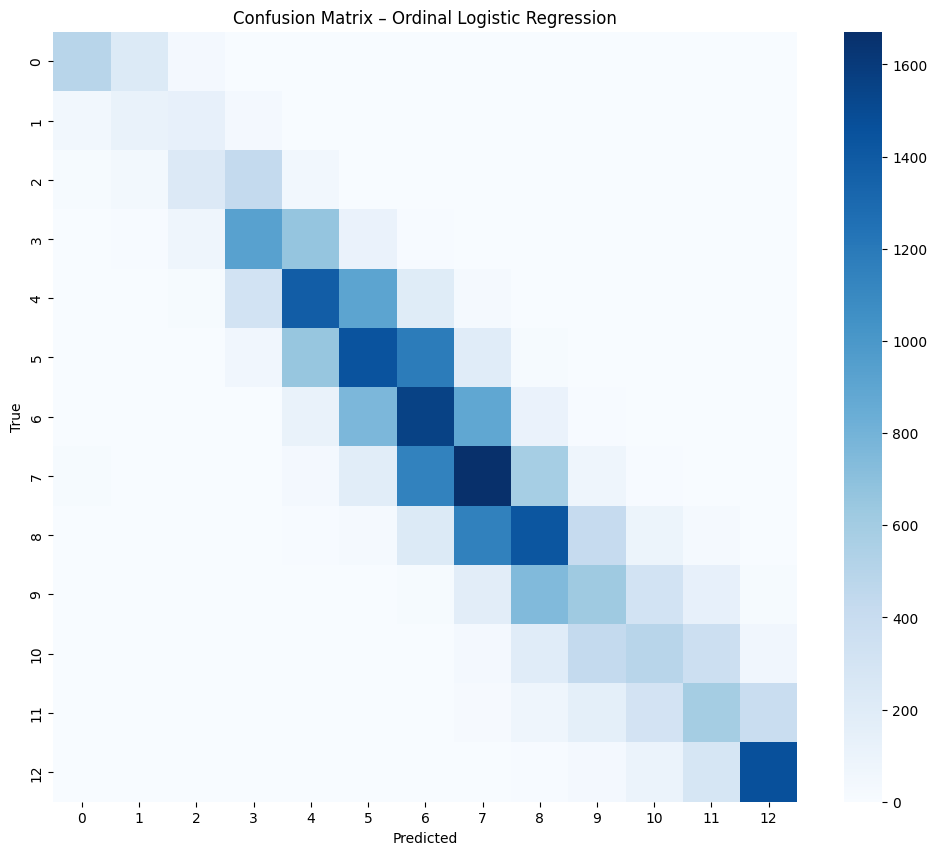

In [59]:
cm = confusion_matrix(y_logreg_test, y_pred_ordlog)

plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=False, cmap="Blues")
plt.title("Confusion Matrix – Ordinal Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Mulitnomial logistic regression (non-ordinal baseline)

In [60]:
from sklearn.linear_model import LogisticRegression

# Multinomial logistic regression model
model_multinom = LogisticRegression(
    multi_class="multinomial",
    solver="lbfgs",
    max_iter=500,
    n_jobs=-1
)

# Train the model
model_multinom.fit(X_logreg_train_scaled, y_logreg_train)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=500, multi_class='multinomial', n_jobs=-1)

In [61]:
#predictions
y_pred_multinom = model_multinom.predict(X_logreg_test_scaled)


In [62]:
kappa = cohen_kappa_score(y_logreg_test, y_pred_multinom, weights='quadratic')
print("Quadratic Weighted Kappa:", round(kappa, 4))

accuracy = accuracy_score(y_logreg_test, y_pred_multinom)
print("Accuracy:", round(accuracy, 4))

Quadratic Weighted Kappa: 0.9485
Accuracy: 0.4861


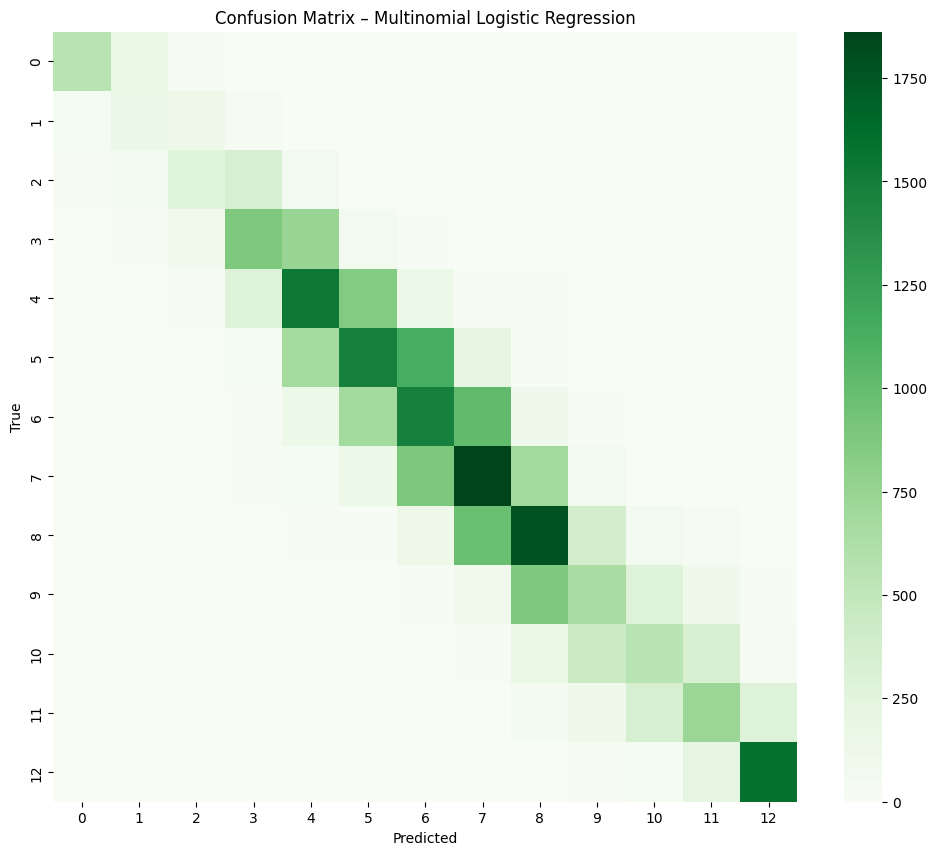

In [63]:
cm_multi = confusion_matrix(y_logreg_test, y_pred_multinom)

plt.figure(figsize=(12, 10))
sns.heatmap(cm_multi, annot=False, cmap="Greens")
plt.title("Confusion Matrix – Multinomial Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# CatBoost

tune both ordinal and multiclass of each model

In [64]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 23.2 MB/s eta 0:00:00


In [65]:
from catboost import CatBoostClassifier

model_cat_class = CatBoostClassifier(
    loss_function="MultiClass",
    eval_metric="MultiClass",
    iterations=2000,
    learning_rate=0.03,
    depth=8,
    l2_leaf_reg=5,
    random_seed=42,
    task_type="GPU",
    verbose=200,
    early_stopping_rounds=100
)

model_cat_class.fit(
    X_tree_train,
    y_tree_train,
    cat_features=cat_features,
    eval_set=(X_tree_test, y_tree_test),
    use_best_model=True
)

0:	learn: 2.4996376	test: 2.5129111	best: 2.5129111 (0)	total: 36.7ms	remaining: 1m 13s
200:	learn: 1.1783176	test: 1.4113130	best: 1.4113130 (200)	total: 4.99s	remaining: 44.6s
400:	learn: 1.0302159	test: 1.3090679	best: 1.3090679 (400)	total: 9.96s	remaining: 39.7s
600:	learn: 0.9532595	test: 1.2625968	best: 1.2625968 (600)	total: 14.8s	remaining: 34.5s
800:	learn: 0.9005574	test: 1.2333539	best: 1.2333539 (800)	total: 19.4s	remaining: 29.1s
1000:	learn: 0.8615208	test: 1.2135214	best: 1.2134779 (999)	total: 24.1s	remaining: 24s
1200:	learn: 0.8284502	test: 1.1982616	best: 1.1982616 (1200)	total: 28.6s	remaining: 19.1s
1400:	learn: 0.8021256	test: 1.1871529	best: 1.1871529 (1400)	total: 33.2s	remaining: 14.2s
1600:	learn: 0.7754411	test: 1.1765805	best: 1.1765579 (1599)	total: 37.7s	remaining: 9.4s
1800:	learn: 0.7499229	test: 1.1665480	best: 1.1665480 (1800)	total: 42.3s	remaining: 4.67s
1999:	learn: 0.7297324	test: 1.1591999	best: 1.1591999 (1999)	total: 46.8s	remaining: 0us
bestTe

In [66]:
# Multiclass predictions (class indices)
y_pred_cat_class = model_cat_class.predict(X_tree_test).astype(int)

In [67]:
from catboost import CatBoostRegressor

model_cat_ord = CatBoostRegressor(
    loss_function="RMSE",
    eval_metric="RMSE",
    iterations=2000,
    learning_rate=0.03,
    depth=8,
    l2_leaf_reg=5,
    random_seed=42,
    task_type="GPU",
    verbose=200,
    early_stopping_rounds=100
)

model_cat_ord.fit(
    X_tree_train,
    y_tree_train,
    cat_features=cat_features,
    eval_set=(X_tree_test, y_tree_test),
    use_best_model=True
)

0:	learn: 2.8036761	test: 2.8664339	best: 2.8664339 (0)	total: 38.9ms	remaining: 1m 17s
200:	learn: 0.7293769	test: 0.8933417	best: 0.8933417 (200)	total: 7.23s	remaining: 1m 4s
400:	learn: 0.6347561	test: 0.7937033	best: 0.7937033 (400)	total: 14.2s	remaining: 56.7s
600:	learn: 0.5914636	test: 0.7519520	best: 0.7519520 (600)	total: 21s	remaining: 48.9s
800:	learn: 0.5645958	test: 0.7278612	best: 0.7278612 (800)	total: 27.8s	remaining: 41.6s
1000:	learn: 0.5451504	test: 0.7116759	best: 0.7116425 (999)	total: 34.5s	remaining: 34.4s
1200:	learn: 0.5295589	test: 0.6995231	best: 0.6995231 (1200)	total: 41.3s	remaining: 27.4s
1400:	learn: 0.5173104	test: 0.6906263	best: 0.6906263 (1400)	total: 48.1s	remaining: 20.6s
1600:	learn: 0.5066929	test: 0.6839012	best: 0.6839012 (1600)	total: 54.8s	remaining: 13.7s
1800:	learn: 0.4976625	test: 0.6781306	best: 0.6781306 (1800)	total: 1m 1s	remaining: 6.82s
1999:	learn: 0.4897174	test: 0.6740530	best: 0.6740530 (1999)	total: 1m 8s	remaining: 0us
bestT

In [68]:
# Ordinal predictions
y_pred_cat_ord = model_cat_ord.predict(X_tree_test).astype(int)

# LightGBM

In [69]:
!pip install lightgbm

In [70]:
import lightgbm as lgb

# ---- LightGBM model ----
model_lgb_ord = lgb.LGBMRegressor(
    objective="regression",
    metric="rmse",
    n_estimators=2000,
    learning_rate=0.03,
    max_depth=8,
    reg_lambda=5,
    random_state=42
)

# Fit using sklearn API
model_lgb_ord.fit(
    X_tree_train,
    y_tree_train,
    eval_set=[(X_tree_test, y_tree_test)],
    eval_metric="rmse",
    categorical_feature=cat_features,
    callbacks=[
        lgb.early_stopping(stopping_rounds=100, verbose=True)
    ]
)


# Predict continuous output
y_pred_cont_lgb_ord = model_lgb_ord.predict(X_tree_test)

# Round to ordinal class index
y_pred_lgb_ord = (
    np.round(y_pred_cont_lgb_ord)
    .clip(0, max(rating_to_num.values()))
    .astype(int)
)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009236 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5195
[LightGBM] [Info] Number of data points in the train set: 69633, number of used features: 67
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 6.891661
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

In [71]:
import lightgbm as lgb

num_classes = len(rating_order)

model_lgb_class = lgb.LGBMClassifier(
    objective="multiclass",
    num_class=num_classes,
    metric="multi_logloss",
    n_estimators=2000,
    learning_rate=0.03,
    max_depth=8,
    reg_lambda=5,
    random_state=42
)

model_lgb_class.fit(
    X_tree_train,
    y_tree_train,
    eval_set=[(X_tree_test, y_tree_test)],
    categorical_feature=cat_features,
    callbacks=[lgb.early_stopping(stopping_rounds=100)]
)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006213 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5195
[LightGBM] [Info] Number of data points in the train set: 69633, number of used features: 67
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score -4.338649
[LightGBM] [Info] Start training from score -4.453960
[LightGBM] [Info] Start training from score -3.962581
[LightGBM] [Info] Start training from score -2.802930
[LightGBM] [Info] Start training from score -2.227403
[LightGBM] [Info] Start training from score -2.034964
[LightGBM] [Info] Start training from score -2.012579
[LightGBM] [Info] Start training from score -2.013117
[LightGBM] [Info] Start training from score -2.138495
[

LGBMClassifier(learning_rate=0.03, max_depth=8, metric='multi_logloss',
               n_estimators=2000, num_class=13, objective='multiclass',
               random_state=42, reg_lambda=5)

In [72]:
y_pred_lgb_class = model_lgb_class.predict(X_tree_test)

# XGBoost

In [73]:
from sklearn.preprocessing import LabelEncoder

tree_df_encoded = tree_df.copy()

cat_cols = tree_df_encoded.select_dtypes(include=["object", "category"]).columns

label_encoders = {}

for col in cat_cols:
    le = LabelEncoder()
    tree_df_encoded[col] = le.fit_transform(tree_df_encoded[col].astype(str))
    label_encoders[col] = le

# Recreate splits
X_tree_train_enc = tree_df_encoded.loc[tree_train_idx].drop(columns=["EnergyRating"])
X_tree_test_enc  = tree_df_encoded.loc[tree_test_idx].drop(columns=["EnergyRating"])
y_tree_train_enc = y_tree_train
y_tree_test_enc  = y_tree_test


In [74]:
import xgboost as xgb

model_xgb_ord = xgb.XGBRegressor(
    objective="reg:squarederror",
    n_estimators=2000,
    learning_rate=0.03,
    max_depth=8,
    reg_lambda=5,
    subsample=0.9,
    colsample_bytree=0.9,
    tree_method="hist",  # CPU-compatible fast histogram algorithm
    random_state=42
)

model_xgb_ord.fit(
    X_tree_train_enc,
    y_tree_train_enc,
    eval_set=[(X_tree_test_enc, y_tree_test_enc)],
    verbose=200
)

# ---- Predictions ----
y_pred_cont_xgb_ord = model_xgb_ord.predict(X_tree_test_enc)

# Convert continuous → ordinal class
y_pred_xgb_ord = (
    np.round(y_pred_cont_xgb_ord)
    .clip(0, max(rating_to_num.values()))
    .astype(int)
)


[0]	validation_0-rmse:2.85872
[200]	validation_0-rmse:0.82897
[400]	validation_0-rmse:0.76585
[600]	validation_0-rmse:0.74539
[800]	validation_0-rmse:0.73324
[1000]	validation_0-rmse:0.72520
[1200]	validation_0-rmse:0.72079
[1400]	validation_0-rmse:0.71715
[1600]	validation_0-rmse:0.71510
[1800]	validation_0-rmse:0.71384
[1999]	validation_0-rmse:0.71350


In [75]:
num_classes = len(rating_order)

model_xgb_class = xgb.XGBClassifier(
    objective="multi:softmax",
    num_class=num_classes,
    n_estimators=2000,
    learning_rate=0.03,
    max_depth=8,
    reg_lambda=5,
    subsample=0.9,
    colsample_bytree=0.9,
    tree_method="hist",
    random_state=42,
    eval_metric="mlogloss"
)

model_xgb_class.fit(
    X_tree_train_enc,
    y_tree_train_enc,
    eval_set=[(X_tree_test_enc, y_tree_test_enc)],
    verbose=200
)



[0]	validation_0-mlogloss:2.50817
[200]	validation_0-mlogloss:1.41208
[400]	validation_0-mlogloss:1.31311
[600]	validation_0-mlogloss:1.27617
[800]	validation_0-mlogloss:1.25737
[1000]	validation_0-mlogloss:1.24814
[1200]	validation_0-mlogloss:1.24559
[1400]	validation_0-mlogloss:1.24572
[1600]	validation_0-mlogloss:1.24835
[1800]	validation_0-mlogloss:1.25213
[1999]	validation_0-mlogloss:1.25704


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.03, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=2000, n_jobs=None, num_class=13, ...)

In [76]:
y_pred_xgb_class = model_xgb_class.predict(X_tree_test_enc)

# EVALUATION


================= MODEL PERFORMANCE =================

XGBoost – Multiclass:
  QWK:       0.9414
  Accuracy:  0.4750

XGBoost – Ordinal:
  QWK:       0.9644
  Accuracy:  0.5618

LightGBM – Multiclass:
  QWK:       0.9413
  Accuracy:  0.4712

LightGBM – Ordinal:
  QWK:       0.9679
  Accuracy:  0.5781

CatBoost – Multiclass:
  QWK:       0.9480
  Accuracy:  0.4987

CatBoost – Ordinal:
  QWK:       0.9545
  Accuracy:  0.4552


================= RANKING BY QWK (BEST → WORST) =================

1. LightGBM – Ordinal         QWK = 0.9679
2. XGBoost – Ordinal          QWK = 0.9644
3. CatBoost – Ordinal         QWK = 0.9545
4. CatBoost – Multiclass      QWK = 0.9480
5. XGBoost – Multiclass       QWK = 0.9414
6. LightGBM – Multiclass      QWK = 0.9413


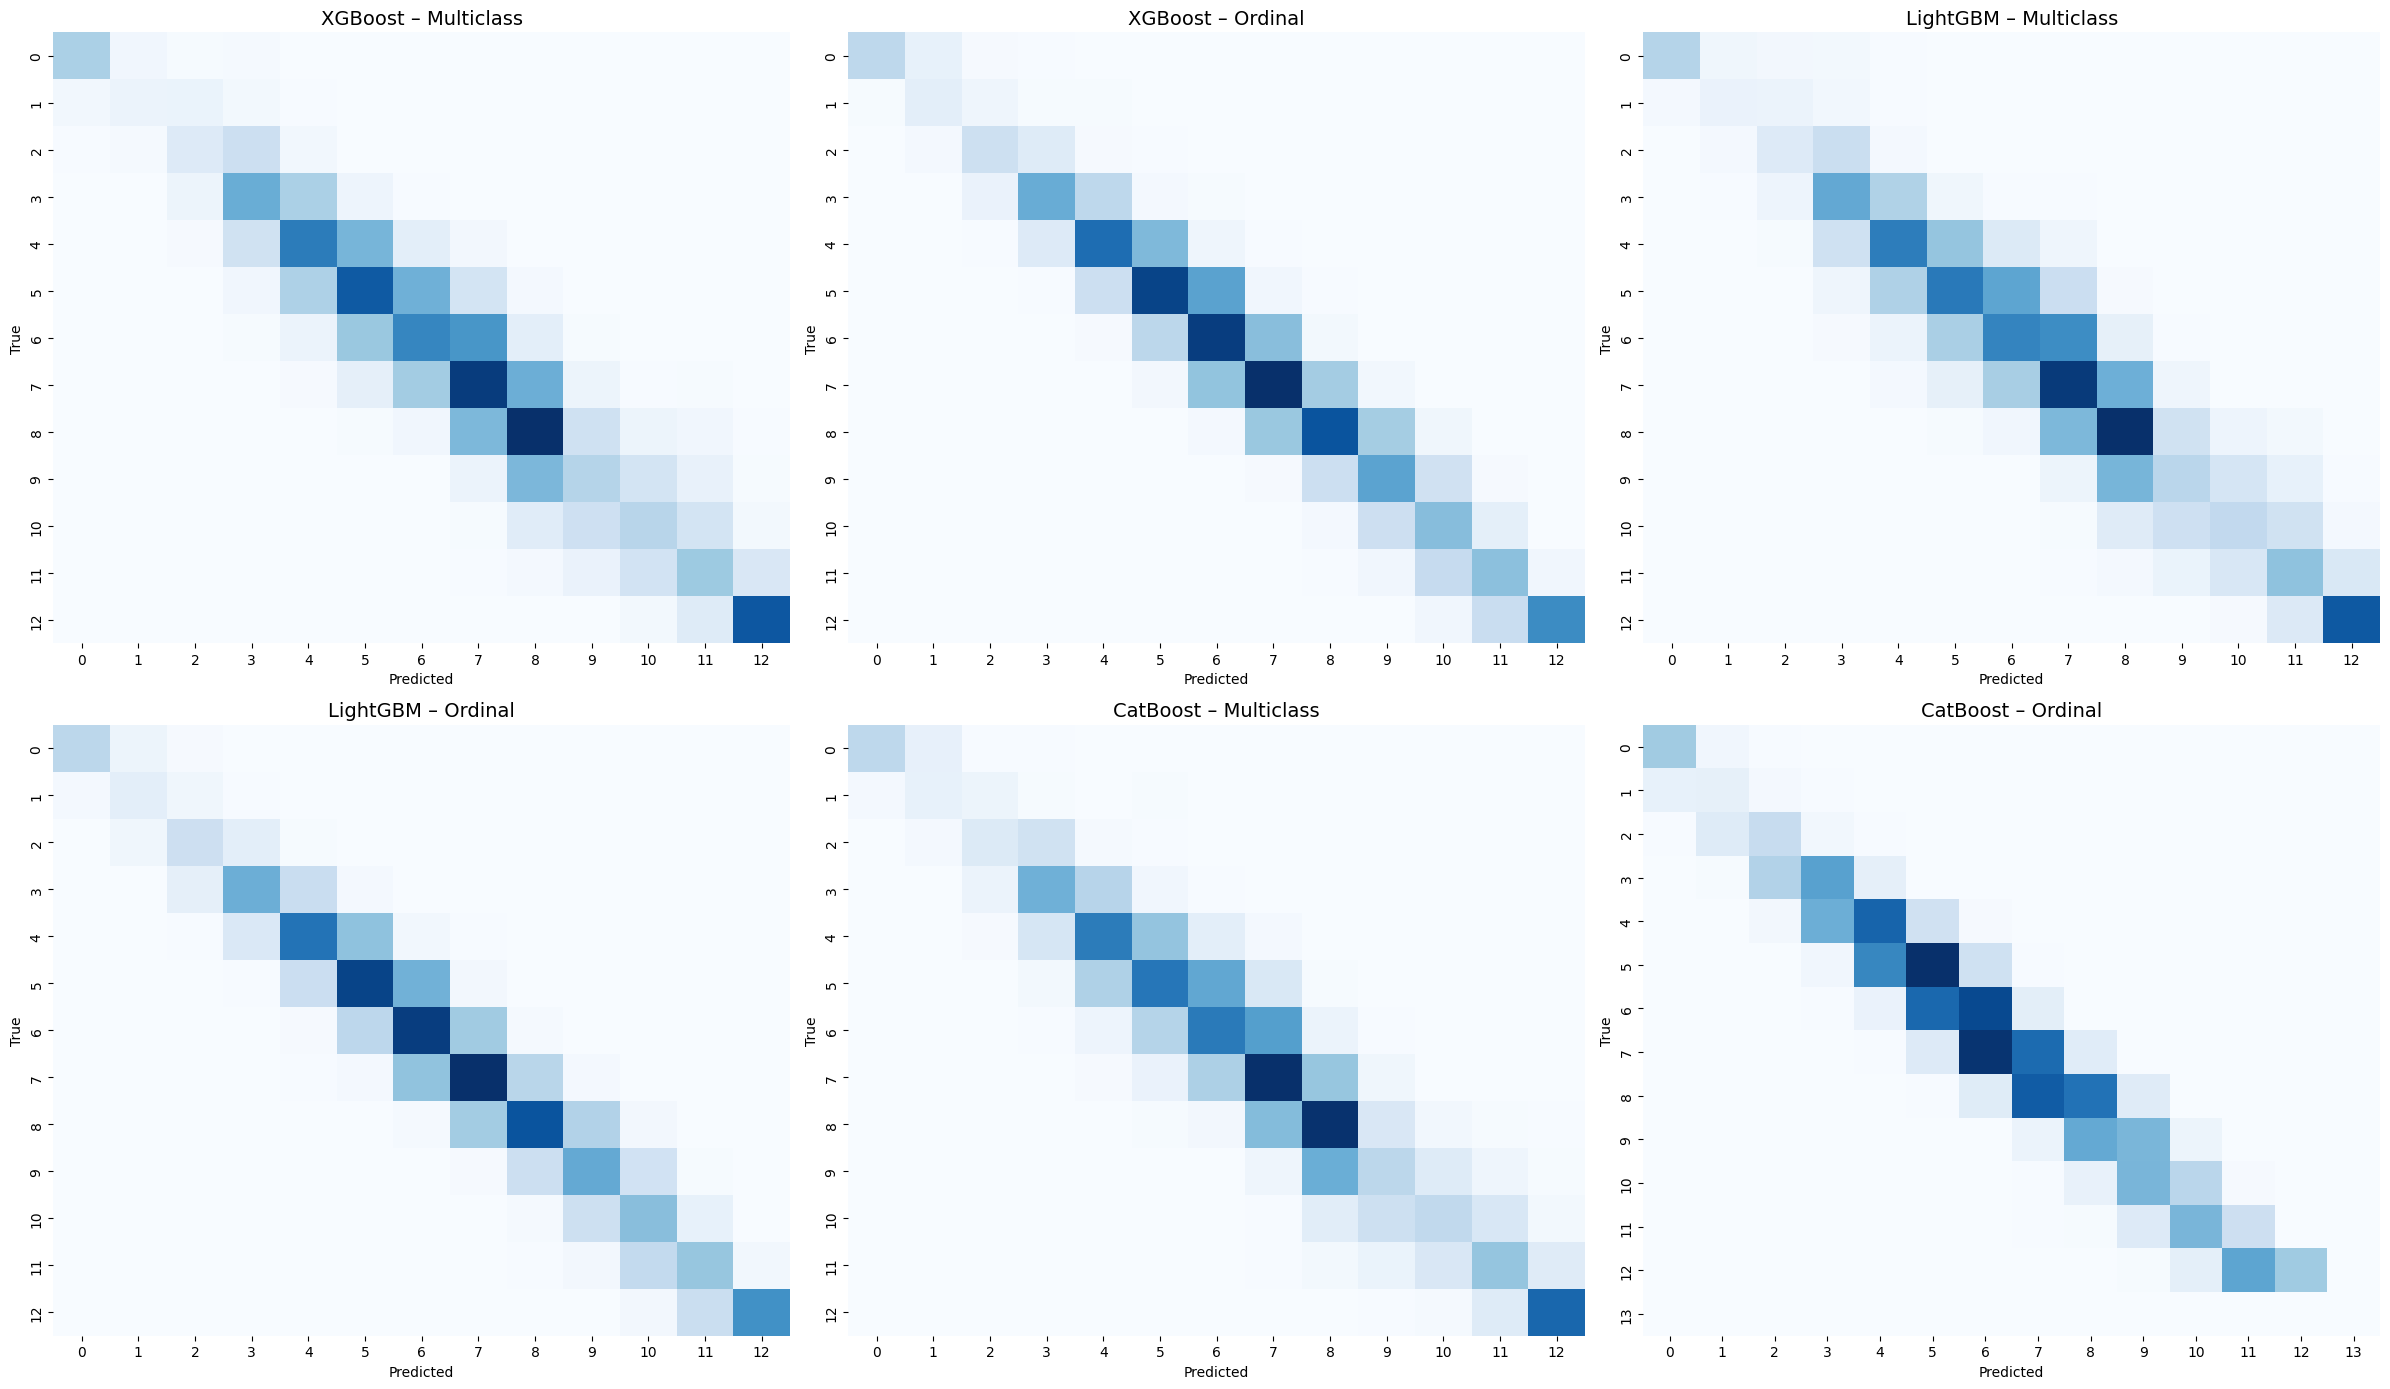

In [77]:

# STORE ALL MODEL PREDICTIONS
models = {
    "XGBoost – Multiclass": y_pred_xgb_class,
    "XGBoost – Ordinal":    y_pred_xgb_ord,
    "LightGBM – Multiclass": y_pred_lgb_class,
    "LightGBM – Ordinal":    y_pred_lgb_ord,
    "CatBoost – Multiclass": y_pred_cat_class,
    "CatBoost – Ordinal":    y_pred_cat_ord
}


# PRINT QWK + ACCURACY FOR EACH MODEL
results = {}

print("\n================= MODEL PERFORMANCE =================\n")
for name, pred in models.items():
    qwk = cohen_kappa_score(y_tree_test, pred, weights='quadratic')
    acc = accuracy_score(y_tree_test, pred)

    results[name] = {"QWK": qwk, "Accuracy": acc}

    print(f"{name}:")
    print(f"  QWK:       {qwk:.4f}")
    print(f"  Accuracy:  {acc:.4f}\n")


# RANK MODELS BY QWK
ranked = sorted(results.items(), key=lambda x: x[1]["QWK"], reverse=True)

print("\n================= RANKING BY QWK (BEST → WORST) =================\n")
for i, (model_name, metrics) in enumerate(ranked, start=1):
    print(f"{i}. {model_name:25s}  QWK = {metrics['QWK']:.4f}")


# CONFUSION MATRICES (2x3 GRID)
fig, axes = plt.subplots(2, 3, figsize=(24, 14))
axes = axes.flatten()

for ax, (name, pred) in zip(axes, models.items()):
    cm = confusion_matrix(y_tree_test, pred)
    sns.heatmap(cm, cmap="Blues", ax=ax, cbar=False)
    ax.set_title(name, fontsize=14)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("True")

plt.tight_layout()
plt.show()


# Feature block selection

In [78]:
feature_blocks = {
    "metadata": [
        "CountyName", "DwellingTypeDescr", "Year_of_Construction",
        "TypeofRating", "NoStoreys", "StructureType", "HESSchemeUpgrade", "MultiDwellingMPRN"
    ],
    "geometry": [
        "GroundFloorArea(sq m)", "WallArea", "RoofArea", "FloorArea",
        "WindowArea", "DoorArea", "GroundFloorArea", "GroundFloorHeight",
        "FirstFloorArea", "FirstFloorHeight", "PredominantRoofTypeArea", "SuspendedWoodenFloor"
    ],
    "fabric": [
        "UValueWall", "UValueRoof", "UValueFloor", "UValueWindow",
        "UvalueDoor", "ThermalBridgingFactor", "ThermalMassCategory",
        "PredominantRoofType"
    ],
    "ventilation": [
        "VentilationMethod", "DraftLobby", "NoOfFansAndVents",
        "NoOfChimneys", "NoOfOpenFlues", "NoOfSidesSheltered",
        "PermeabilityTest", "PercentageDraughtStripped"
    ],
    "heating_type": [
      "MainSpaceHeatingFuel",
      "MainWaterHeatingFuel",
      "SupplSHFuel",
      "SupplWHFuel",
      "UndergroundHeating"
    ],
    "heating_control": [
        "NoCentralHeatingPumps", "CHBoilerThermostatControlled",
        "NoOilBoilerHeatingPumps", "OBBoilerThermostatControlled",
        "OBPumpInsideDwelling", "NoGasBoilerHeatingPumps",
        "WarmAirHeatingSystem", "CombiBoiler", "KeepHotFacility",
        "CylinderStat", "CombinedCylinder"
    ],
    "hot_water": [
        "SolarHotWaterHeating", "ElecImmersionInSummer",
        "WaterStorageVolume", "InsulationType", "InsulationThickness"
    ],
    "renewables": [
      "SHRenewableResources", "WHRenewableResources", "SWHPumpSolarPowered"
    ],
    "efficiency_losses": [
        "HSMainSystemEfficiency", "TGDLEdition", "HSEffAdjFactor",
        "HSSupplHeatFraction", "DistributionLosses", "StorageLosses",
        "ManuLossFactorAvail"
    ]
}


In [79]:
#baseline metrics

baseline_qwk = cohen_kappa_score(y_tree_test, y_pred_lgb_ord, weights="quadratic")
baseline_acc = accuracy_score(y_tree_test, y_pred_lgb_ord)

results = [{
    "Feature Configuration": "All Features",
    "QWK": baseline_qwk,
    "Accuracy": baseline_acc,
    "Δ QWK vs All": 0.0,
    "Δ Accuracy": 0.0
}]


In [80]:

#  train LightGBM ordinal + return QWK & Accuracy

def run_lgb_ordinal(X_train, X_valid, y_train, y_valid, cat_cols, random_state=42):
    model = lgb.LGBMRegressor(
        objective="regression",
        metric="rmse",
        n_estimators=2000,
        learning_rate=0.03,
        max_depth=8,
        reg_lambda=5,
        random_state=random_state
    )

    model.fit(
        X_train,
        y_train,
        eval_set=[(X_valid, y_valid)],
        eval_metric="rmse",
        categorical_feature=cat_cols,
        callbacks=[lgb.early_stopping(stopping_rounds=100, verbose=False)]
    )

    # Continuous → ordinal class
    y_pred_cont = model.predict(X_valid)
    max_class = int(max(y_train.max(), y_valid.max()))
    y_pred = (
        np.round(y_pred_cont)
        .clip(0, max_class)
        .astype(int)
    )

    qwk = cohen_kappa_score(y_valid, y_pred, weights="quadratic")
    acc = accuracy_score(y_valid, y_pred)
    return qwk, acc



In [81]:

# Remove-One-Block
all_features = X_tree_train.columns.tolist()
cat_all = [c for c in cat_features if c in all_features]

for block_name, cols in feature_blocks.items():
    # Make sure we only drop columns that actually exist
    cols_to_remove = [c for c in cols if c in all_features]
    remaining_features = [c for c in all_features if c not in cols_to_remove]
    cat_remaining = [c for c in cat_features if c in remaining_features]

    qwk, acc = run_lgb_ordinal(
        X_tree_train[remaining_features],
        X_tree_test[remaining_features],
        y_tree_train,
        y_tree_test,
        cat_remaining
    )

    results.append({
        "Feature Configuration": f"All minus {block_name}",
        "QWK": qwk,
        "Accuracy": acc,
        "Δ QWK vs All": qwk - baseline_qwk,
        "Δ Accuracy": acc - baseline_acc
    })


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.017689 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4961
[LightGBM] [Info] Number of data points in the train set: 69633, number of used features: 59
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 6.891661
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing row-wise multi-t

In [82]:
results_df = pd.DataFrame(results)
results_df

Feature Configuration       QWK  Accuracy  Δ QWK vs All  Δ Accuracy
0                 All Features  0.967920  0.578091      0.000000    0.000000
1           All minus metadata  0.967771  0.579747     -0.000149    0.001655
2           All minus geometry  0.954063  0.511876     -0.013857   -0.066216
3             All minus fabric  0.900117  0.374046     -0.067803   -0.204045
4        All minus ventilation  0.964699  0.548942     -0.003222   -0.029149
5       All minus heating_type  0.966701  0.567187     -0.001219   -0.010904
6    All minus heating_control  0.967178  0.577947     -0.000743   -0.000144
7          All minus hot_water  0.962127  0.543616     -0.005793   -0.034475
8         All minus renewables  0.967606  0.576868     -0.000314   -0.001224
9  All minus efficiency_losses  0.951676  0.480855     -0.016245   -0.097236

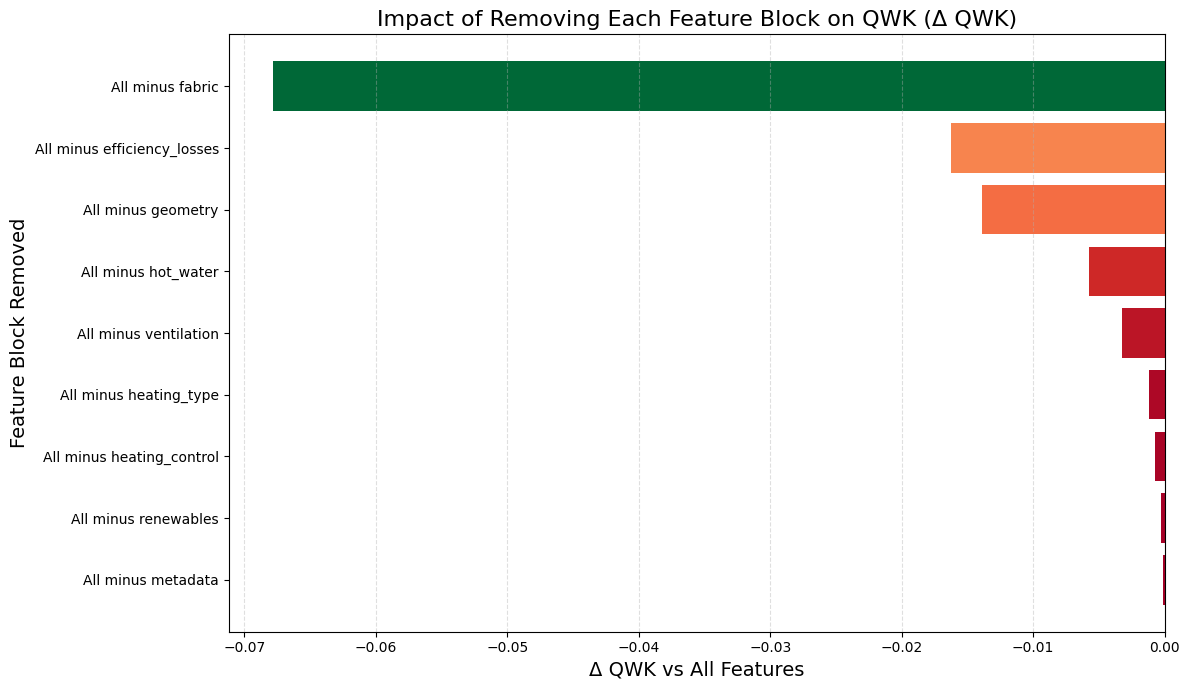

In [83]:
# Sort blocks from most to least important (largest negative Δ QWK)
plot_df = results_df.copy()
plot_df = plot_df[plot_df["Feature Configuration"] != "All Features"]
plot_df = plot_df.sort_values("Δ QWK vs All", ascending=False)

# Normalise Δ QWK for colour mapping
vals = plot_df["Δ QWK vs All"].values
norm = (vals - vals.min()) / (vals.max() - vals.min())

# Correct BER-style colormap (green → red)
colors = plt.cm.RdYlGn_r(norm)

# Plot
plt.figure(figsize=(12, 7))
bars = plt.barh(plot_df["Feature Configuration"], plot_df["Δ QWK vs All"], color=colors)

plt.title("Impact of Removing Each Feature Block on QWK (Δ QWK)", fontsize=16)
plt.xlabel("Δ QWK vs All Features", fontsize=14)
plt.ylabel("Feature Block Removed", fontsize=14)

plt.grid(axis='x', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()


In [84]:
best_blocks = (
    feature_blocks["fabric"]
    + feature_blocks["efficiency_losses"]
    + feature_blocks["geometry"]
    + feature_blocks["hot_water"]
    + feature_blocks["ventilation"]
)

X_train_red = X_tree_train[best_blocks]
X_test_red  = X_tree_test[best_blocks]

# hyper-parameter tuning

In [85]:
# Remove categorical features that don't exist in the reduced set
cat_features_red = [c for c in cat_features if c in best_blocks]

#for xgboost
X_train_red_enc = X_tree_train_enc[best_blocks]
X_test_red_enc  = X_tree_test_enc[best_blocks]


In [86]:
!pip install optuna
import optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.7/404.7 kB 31.1 MB/s eta 0:00:00


CatBoost Tuned

In [87]:
def objective_catboost(trial):

    params = {
        "loss_function": "RMSE",
        "eval_metric": "RMSE",
        "iterations": trial.suggest_int("iterations", 800, 2500),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.1),
        "depth": trial.suggest_int("depth", 4, 10),
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1, 20),
        "random_seed": 42,
        "task_type": "GPU",
        "verbose": False
    }

    model = CatBoostRegressor(**params)

    model.fit(
        X_train_red,
        y_tree_train,
        cat_features=cat_features_red,
        eval_set=(X_test_red, y_tree_test),
        verbose=False,
    )

    # Predict → round → ordinal
    y_cont = model.predict(X_test_red)
    y_pred = (
        np.round(y_cont)
        .clip(0, max(y_tree_test.max(), y_tree_train.max()))
        .astype(int)
    )

    return cohen_kappa_score(y_tree_test, y_pred, weights="quadratic")


In [88]:
study_cat = optuna.create_study(direction="maximize")
study_cat.optimize(objective_catboost, n_trials=40)

best_cat_params = study_cat.best_params
best_cat_params


[I 2025-11-30 10:38:19,902] A new study created in memory with name: no-name-7d32ac61-2790-4095-a924-dbe5a6b96453
[I 2025-11-30 10:39:03,931] Trial 0 finished with value: 0.9679916603477161 and parameters: {'iterations': 2266, 'learning_rate': 0.058589111300552416, 'depth': 7, 'l2_leaf_reg': 6.703254478998273}. Best is trial 0 with value: 0.9679916603477161.
[I 2025-11-30 10:39:20,590] Trial 1 finished with value: 0.9628478739180509 and parameters: {'iterations': 1187, 'learning_rate': 0.045129367389520204, 'depth': 5, 'l2_leaf_reg': 11.15524814338915}. Best is trial 0 with value: 0.9679916603477161.
[I 2025-11-30 10:40:14,557] Trial 2 finished with value: 0.9677911865343803 and parameters: {'iterations': 2346, 'learning_rate': 0.06952262381303763, 'depth': 8, 'l2_leaf_reg': 19.79392542661837}. Best is trial 0 with value: 0.9679916603477161.
[I 2025-11-30 10:40:39,159] Trial 3 finished with value: 0.9664276340543456 and parameters: {'iterations': 2380, 'learning_rate': 0.08810460869109

{'iterations': 2486,
 'learning_rate': 0.09331181544114799,
 'depth': 6,
 'l2_leaf_reg': 1.0439089510361308}

LGBM Tuned

In [89]:
def objective_lgbm(trial):

    params = {
        "objective": "regression",
        "metric": "rmse",
        "n_estimators": trial.suggest_int("n_estimators", 800, 2500),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.1),
        "max_depth": trial.suggest_int("max_depth", 4, 10),
        "num_leaves": trial.suggest_int("num_leaves", 16, 256),
        "reg_lambda": trial.suggest_float("reg_lambda", 1, 20),
        "random_state": 42
    }

    model = lgb.LGBMRegressor(**params)

    model.fit(
        X_train_red,
        y_tree_train,
        eval_set=[(X_test_red, y_tree_test)],
        categorical_feature=cat_features_red,
        callbacks=[
            lgb.early_stopping(stopping_rounds=100, verbose=True)
        ]
    )

    y_cont = model.predict(X_test_red)
    y_pred = (
        np.round(y_cont)
        .clip(0, max(y_tree_test.max(), y_tree_train.max()))
        .astype(int)
    )

    return cohen_kappa_score(y_tree_test, y_pred, weights="quadratic")


In [90]:
study_lgbm = optuna.create_study(direction="maximize")
study_lgbm.optimize(objective_lgbm, n_trials=40)

best_lgbm_params = study_lgbm.best_params
best_lgbm_params


[I 2025-11-30 11:04:08,909] A new study created in memory with name: no-name-7af33f42-1448-4b55-b48b-29cb031bac84


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014075 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4846
[LightGBM] [Info] Number of data points in the train set: 69633, number of used features: 40
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 6.891661
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

[I 2025-11-30 11:04:14,882] Trial 0 finished with value: 0.9648004180188086 and parameters: {'n_estimators': 1479, 'learning_rate': 0.09088201319151802, 'max_depth': 10, 'num_leaves': 55, 'reg_lambda': 6.456151376905292}. Best is trial 0 with value: 0.9648004180188086.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006498 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4846
[LightGBM] [Info] Number of data points in the train set: 69633, number of used features: 40
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 6.891661
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

[I 2025-11-30 11:04:24,367] Trial 1 finished with value: 0.9631062361632856 and parameters: {'n_estimators': 927, 'learning_rate': 0.05513548751407235, 'max_depth': 9, 'num_leaves': 145, 'reg_lambda': 8.013518910842405}. Best is trial 0 with value: 0.9648004180188086.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004841 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4846
[LightGBM] [Info] Number of data points in the train set: 69633, number of used features: 40
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 6.891661
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

[I 2025-11-30 11:04:28,847] Trial 2 finished with value: 0.9635365593985477 and parameters: {'n_estimators': 824, 'learning_rate': 0.07836829299772234, 'max_depth': 7, 'num_leaves': 82, 'reg_lambda': 14.356127839736457}. Best is trial 0 with value: 0.9648004180188086.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004933 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4846
[LightGBM] [Info] Number of data points in the train set: 69633, number of used features: 40
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 6.891661
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

[I 2025-11-30 11:04:35,940] Trial 3 finished with value: 0.9631758648811697 and parameters: {'n_estimators': 2440, 'learning_rate': 0.07990627602886491, 'max_depth': 8, 'num_leaves': 155, 'reg_lambda': 14.499316743244147}. Best is trial 0 with value: 0.9648004180188086.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005535 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4846
[LightGBM] [Info] Number of data points in the train set: 69633, number of used features: 40
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 6.891661
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

[I 2025-11-30 11:04:42,403] Trial 4 finished with value: 0.9652132521268747 and parameters: {'n_estimators': 2201, 'learning_rate': 0.07904948447689746, 'max_depth': 7, 'num_leaves': 50, 'reg_lambda': 7.648881527295538}. Best is trial 4 with value: 0.9652132521268747.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004772 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4846
[LightGBM] [Info] Number of data points in the train set: 69633, number of used features: 40
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 6.891661
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

[I 2025-11-30 11:04:50,098] Trial 5 finished with value: 0.9647351245453022 and parameters: {'n_estimators': 2078, 'learning_rate': 0.08787345559514613, 'max_depth': 6, 'num_leaves': 253, 'reg_lambda': 10.94804626017043}. Best is trial 4 with value: 0.9652132521268747.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005839 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4846
[LightGBM] [Info] Number of data points in the train set: 69633, number of used features: 40
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 6.891661
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

[I 2025-11-30 11:04:56,500] Trial 6 finished with value: 0.9645310536927979 and parameters: {'n_estimators': 1855, 'learning_rate': 0.03912632729504747, 'max_depth': 5, 'num_leaves': 246, 'reg_lambda': 5.860658467880072}. Best is trial 4 with value: 0.9652132521268747.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005716 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4846
[LightGBM] [Info] Number of data points in the train set: 69633, number of used features: 40
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 6.891661
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

[I 2025-11-30 11:05:03,561] Trial 7 finished with value: 0.9608374989159653 and parameters: {'n_estimators': 1570, 'learning_rate': 0.015593424444732771, 'max_depth': 6, 'num_leaves': 36, 'reg_lambda': 5.431174101645545}. Best is trial 4 with value: 0.9652132521268747.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004602 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4846
[LightGBM] [Info] Number of data points in the train set: 69633, number of used features: 40
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 6.891661
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

[I 2025-11-30 11:05:10,624] Trial 8 finished with value: 0.9640739014263656 and parameters: {'n_estimators': 1606, 'learning_rate': 0.04811778036913647, 'max_depth': 7, 'num_leaves': 165, 'reg_lambda': 13.831791657106056}. Best is trial 4 with value: 0.9652132521268747.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004567 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4846
[LightGBM] [Info] Number of data points in the train set: 69633, number of used features: 40
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 6.891661
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

[I 2025-11-30 11:05:19,917] Trial 9 finished with value: 0.963129654499195 and parameters: {'n_estimators': 1659, 'learning_rate': 0.08335002184166355, 'max_depth': 8, 'num_leaves': 140, 'reg_lambda': 8.592099026298273}. Best is trial 4 with value: 0.9652132521268747.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005098 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4846
[LightGBM] [Info] Number of data points in the train set: 69633, number of used features: 40
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 6.891661
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

[I 2025-11-30 11:05:26,162] Trial 10 finished with value: 0.966122782499696 and parameters: {'n_estimators': 2478, 'learning_rate': 0.06354923038342902, 'max_depth': 4, 'num_leaves': 91, 'reg_lambda': 17.145341366629456}. Best is trial 10 with value: 0.966122782499696.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005937 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4846
[LightGBM] [Info] Number of data points in the train set: 69633, number of used features: 40
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 6.891661
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

[I 2025-11-30 11:05:32,921] Trial 11 finished with value: 0.9663051171062438 and parameters: {'n_estimators': 2472, 'learning_rate': 0.06350113145071389, 'max_depth': 4, 'num_leaves': 92, 'reg_lambda': 1.7452480984779637}. Best is trial 11 with value: 0.9663051171062438.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005325 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4846
[LightGBM] [Info] Number of data points in the train set: 69633, number of used features: 40
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 6.891661
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

[I 2025-11-30 11:05:39,253] Trial 12 finished with value: 0.9660583809239166 and parameters: {'n_estimators': 2463, 'learning_rate': 0.06330416077493127, 'max_depth': 4, 'num_leaves': 96, 'reg_lambda': 1.3335893769140768}. Best is trial 11 with value: 0.9663051171062438.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005872 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4846
[LightGBM] [Info] Number of data points in the train set: 69633, number of used features: 40
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 6.891661
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

[I 2025-11-30 11:05:45,276] Trial 13 finished with value: 0.9659722415152178 and parameters: {'n_estimators': 2207, 'learning_rate': 0.06541289343007904, 'max_depth': 4, 'num_leaves': 104, 'reg_lambda': 18.814074895705605}. Best is trial 11 with value: 0.9663051171062438.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005064 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4846
[LightGBM] [Info] Number of data points in the train set: 69633, number of used features: 40
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 6.891661
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

[I 2025-11-30 11:05:49,294] Trial 14 finished with value: 0.962914852159522 and parameters: {'n_estimators': 1158, 'learning_rate': 0.03639138444319423, 'max_depth': 5, 'num_leaves': 196, 'reg_lambda': 18.49525571355807}. Best is trial 11 with value: 0.9663051171062438.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011939 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4846
[LightGBM] [Info] Number of data points in the train set: 69633, number of used features: 40
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 6.891661
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

[I 2025-11-30 11:05:55,609] Trial 15 finished with value: 0.9649242821793129 and parameters: {'n_estimators': 2043, 'learning_rate': 0.06606176498694977, 'max_depth': 4, 'num_leaves': 109, 'reg_lambda': 1.2926540071561436}. Best is trial 11 with value: 0.9663051171062438.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005595 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4846
[LightGBM] [Info] Number of data points in the train set: 69633, number of used features: 40
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 6.891661
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

[I 2025-11-30 11:06:01,363] Trial 16 finished with value: 0.9655534520270196 and parameters: {'n_estimators': 2373, 'learning_rate': 0.09781461614133197, 'max_depth': 5, 'num_leaves': 75, 'reg_lambda': 16.553958910144388}. Best is trial 11 with value: 0.9663051171062438.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004017 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4846
[LightGBM] [Info] Number of data points in the train set: 69633, number of used features: 40
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 6.891661
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

[I 2025-11-30 11:06:06,952] Trial 17 finished with value: 0.9613872241287806 and parameters: {'n_estimators': 1892, 'learning_rate': 0.02406344254821603, 'max_depth': 4, 'num_leaves': 19, 'reg_lambda': 3.381657235063115}. Best is trial 11 with value: 0.9663051171062438.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014746 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4846
[LightGBM] [Info] Number of data points in the train set: 69633, number of used features: 40
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 6.891661
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

[I 2025-11-30 11:06:15,748] Trial 18 finished with value: 0.9651570089458951 and parameters: {'n_estimators': 2317, 'learning_rate': 0.05473258058816484, 'max_depth': 6, 'num_leaves': 129, 'reg_lambda': 11.258152873414812}. Best is trial 11 with value: 0.9663051171062438.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005197 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4846
[LightGBM] [Info] Number of data points in the train set: 69633, number of used features: 40
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 6.891661
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

[I 2025-11-30 11:06:24,113] Trial 19 finished with value: 0.9664057254754423 and parameters: {'n_estimators': 2495, 'learning_rate': 0.07015746179534792, 'max_depth': 5, 'num_leaves': 187, 'reg_lambda': 19.906833078024242}. Best is trial 19 with value: 0.9664057254754423.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005542 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4846
[LightGBM] [Info] Number of data points in the train set: 69633, number of used features: 40
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 6.891661
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

[I 2025-11-30 11:06:28,753] Trial 20 finished with value: 0.965218866409916 and parameters: {'n_estimators': 1371, 'learning_rate': 0.07155419818963547, 'max_depth': 5, 'num_leaves': 218, 'reg_lambda': 12.427614923987639}. Best is trial 19 with value: 0.9664057254754423.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005445 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4846
[LightGBM] [Info] Number of data points in the train set: 69633, number of used features: 40
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 6.891661
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

[I 2025-11-30 11:06:35,266] Trial 21 finished with value: 0.965739447167081 and parameters: {'n_estimators': 2260, 'learning_rate': 0.05720211298585698, 'max_depth': 4, 'num_leaves': 174, 'reg_lambda': 19.557746611299503}. Best is trial 19 with value: 0.9664057254754423.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004489 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4846
[LightGBM] [Info] Number of data points in the train set: 69633, number of used features: 40
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 6.891661
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

[I 2025-11-30 11:06:43,414] Trial 22 finished with value: 0.9653604974738195 and parameters: {'n_estimators': 2497, 'learning_rate': 0.0448087073982933, 'max_depth': 5, 'num_leaves': 117, 'reg_lambda': 16.744201508198017}. Best is trial 19 with value: 0.9664057254754423.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004961 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4846
[LightGBM] [Info] Number of data points in the train set: 69633, number of used features: 40
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 6.891661
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

[I 2025-11-30 11:06:49,166] Trial 23 finished with value: 0.965510390416646 and parameters: {'n_estimators': 1964, 'learning_rate': 0.07237711304310565, 'max_depth': 4, 'num_leaves': 199, 'reg_lambda': 16.41216738485303}. Best is trial 19 with value: 0.9664057254754423.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005060 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4846
[LightGBM] [Info] Number of data points in the train set: 69633, number of used features: 40
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 6.891661
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

[I 2025-11-30 11:06:56,505] Trial 24 finished with value: 0.9646386243413446 and parameters: {'n_estimators': 2163, 'learning_rate': 0.0692108024059626, 'max_depth': 6, 'num_leaves': 76, 'reg_lambda': 17.500059654179555}. Best is trial 19 with value: 0.9664057254754423.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005846 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4846
[LightGBM] [Info] Number of data points in the train set: 69633, number of used features: 40
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 6.891661
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

[I 2025-11-30 11:07:04,181] Trial 25 finished with value: 0.9660004429442306 and parameters: {'n_estimators': 2328, 'learning_rate': 0.059507126581195294, 'max_depth': 5, 'num_leaves': 185, 'reg_lambda': 19.977362127283747}. Best is trial 19 with value: 0.9664057254754423.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004907 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4846
[LightGBM] [Info] Number of data points in the train set: 69633, number of used features: 40
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 6.891661
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

[I 2025-11-30 11:07:09,018] Trial 26 finished with value: 0.9645882383450243 and parameters: {'n_estimators': 1779, 'learning_rate': 0.05219655556402267, 'max_depth': 4, 'num_leaves': 222, 'reg_lambda': 3.34580682994371}. Best is trial 19 with value: 0.9664057254754423.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006008 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4846
[LightGBM] [Info] Number of data points in the train set: 69633, number of used features: 40
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 6.891661
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

[I 2025-11-30 11:07:14,123] Trial 27 finished with value: 0.9652125204781897 and parameters: {'n_estimators': 2073, 'learning_rate': 0.07500941324171954, 'max_depth': 5, 'num_leaves': 90, 'reg_lambda': 9.658945836710359}. Best is trial 19 with value: 0.9664057254754423.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004903 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4846
[LightGBM] [Info] Number of data points in the train set: 69633, number of used features: 40
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 6.891661
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

[I 2025-11-30 11:07:20,426] Trial 28 finished with value: 0.9641154029690424 and parameters: {'n_estimators': 2376, 'learning_rate': 0.03493705637435071, 'max_depth': 4, 'num_leaves': 124, 'reg_lambda': 17.821783413597338}. Best is trial 19 with value: 0.9664057254754423.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004976 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4846
[LightGBM] [Info] Number of data points in the train set: 69633, number of used features: 40
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 6.891661
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

[I 2025-11-30 11:07:27,157] Trial 29 finished with value: 0.9653579655366337 and parameters: {'n_estimators': 2500, 'learning_rate': 0.08967723345446013, 'max_depth': 6, 'num_leaves': 58, 'reg_lambda': 15.636837037298196}. Best is trial 19 with value: 0.9664057254754423.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006462 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4846
[LightGBM] [Info] Number of data points in the train set: 69633, number of used features: 40
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 6.891661
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

[I 2025-11-30 11:07:34,409] Trial 30 finished with value: 0.9652782960936573 and parameters: {'n_estimators': 1373, 'learning_rate': 0.06164335196170007, 'max_depth': 10, 'num_leaves': 64, 'reg_lambda': 13.01474916036788}. Best is trial 19 with value: 0.9664057254754423.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014176 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4846
[LightGBM] [Info] Number of data points in the train set: 69633, number of used features: 40
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 6.891661
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

[I 2025-11-30 11:07:41,636] Trial 31 finished with value: 0.9662817201932702 and parameters: {'n_estimators': 2376, 'learning_rate': 0.06426143836719972, 'max_depth': 4, 'num_leaves': 93, 'reg_lambda': 1.5781538853511394}. Best is trial 19 with value: 0.9664057254754423.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005462 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4846
[LightGBM] [Info] Number of data points in the train set: 69633, number of used features: 40
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 6.891661
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

[I 2025-11-30 11:07:48,036] Trial 32 finished with value: 0.9651938550699927 and parameters: {'n_estimators': 2364, 'learning_rate': 0.05075853708331665, 'max_depth': 4, 'num_leaves': 96, 'reg_lambda': 3.4922782597493107}. Best is trial 19 with value: 0.9664057254754423.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006099 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4846
[LightGBM] [Info] Number of data points in the train set: 69633, number of used features: 40
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 6.891661
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

[I 2025-11-30 11:07:54,873] Trial 33 finished with value: 0.9658464848496275 and parameters: {'n_estimators': 2260, 'learning_rate': 0.0681040350254896, 'max_depth': 5, 'num_leaves': 146, 'reg_lambda': 4.806308212716509}. Best is trial 19 with value: 0.9664057254754423.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004912 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4846
[LightGBM] [Info] Number of data points in the train set: 69633, number of used features: 40
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 6.891661
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

[I 2025-11-30 11:08:04,059] Trial 34 finished with value: 0.9659809852271816 and parameters: {'n_estimators': 2419, 'learning_rate': 0.058158571428756495, 'max_depth': 9, 'num_leaves': 38, 'reg_lambda': 6.919792302795578}. Best is trial 19 with value: 0.9664057254754423.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004770 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4846
[LightGBM] [Info] Number of data points in the train set: 69633, number of used features: 40
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 6.891661
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

[I 2025-11-30 11:08:09,886] Trial 35 finished with value: 0.9659461385684955 and parameters: {'n_estimators': 2172, 'learning_rate': 0.07730702684396488, 'max_depth': 4, 'num_leaves': 114, 'reg_lambda': 1.9444194382094464}. Best is trial 19 with value: 0.9664057254754423.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005762 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4846
[LightGBM] [Info] Number of data points in the train set: 69633, number of used features: 40
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 6.891661
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

[I 2025-11-30 11:08:16,333] Trial 36 finished with value: 0.9643757755747495 and parameters: {'n_estimators': 2283, 'learning_rate': 0.0820731853155345, 'max_depth': 8, 'num_leaves': 82, 'reg_lambda': 2.4194817727644686}. Best is trial 19 with value: 0.9664057254754423.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006395 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4846
[LightGBM] [Info] Number of data points in the train set: 69633, number of used features: 40
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 6.891661
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

[I 2025-11-30 11:08:24,631] Trial 37 finished with value: 0.9653474836532352 and parameters: {'n_estimators': 2417, 'learning_rate': 0.04483593800747795, 'max_depth': 5, 'num_leaves': 70, 'reg_lambda': 4.286811187993414}. Best is trial 19 with value: 0.9664057254754423.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005448 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4846
[LightGBM] [Info] Number of data points in the train set: 69633, number of used features: 40
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 6.891661
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

[I 2025-11-30 11:08:30,748] Trial 38 finished with value: 0.9660199796874692 and parameters: {'n_estimators': 2116, 'learning_rate': 0.08417448921453664, 'max_depth': 4, 'num_leaves': 44, 'reg_lambda': 15.523978541583931}. Best is trial 19 with value: 0.9664057254754423.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005360 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4846
[LightGBM] [Info] Number of data points in the train set: 69633, number of used features: 40
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 6.891661
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

[I 2025-11-30 11:08:34,799] Trial 39 finished with value: 0.9652586452691924 and parameters: {'n_estimators': 910, 'learning_rate': 0.09469454383639311, 'max_depth': 6, 'num_leaves': 146, 'reg_lambda': 9.263099043849278}. Best is trial 19 with value: 0.9664057254754423.


{'n_estimators': 2495,
 'learning_rate': 0.07015746179534792,
 'max_depth': 5,
 'num_leaves': 187,
 'reg_lambda': 19.906833078024242}

XGB Tuned

In [91]:
def objective_xgb(trial):

    params = {
        "objective": "reg:squarederror",
        "n_estimators": trial.suggest_int("n_estimators", 800, 2500),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.1),
        "max_depth": trial.suggest_int("max_depth", 4, 10),
        "reg_lambda": trial.suggest_float("reg_lambda", 1, 20),
        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
        "tree_method": "hist",
        "random_state": 42
    }

    model = xgb.XGBRegressor(**params)

    model.fit(X_train_red_enc, y_tree_train)

    y_cont = model.predict(X_test_red_enc)
    y_pred = (
        np.round(y_cont)
        .clip(0, max(y_tree_test.max(), y_tree_train.max()))
        .astype(int)
    )

    return cohen_kappa_score(y_tree_test, y_pred, weights="quadratic")


In [92]:
study_xgb = optuna.create_study(direction="maximize")
study_xgb.optimize(objective_xgb, n_trials=40)

best_xgb_params = study_xgb.best_params
best_xgb_params


[I 2025-11-30 11:08:34,812] A new study created in memory with name: no-name-97077b5c-ae97-4858-aafe-a78712c8857c
[I 2025-11-30 11:08:44,651] Trial 0 finished with value: 0.9613316789323096 and parameters: {'n_estimators': 976, 'learning_rate': 0.08028735200411566, 'max_depth': 9, 'reg_lambda': 7.590227609694673, 'subsample': 0.9808592484959098, 'colsample_bytree': 0.6184653528403541}. Best is trial 0 with value: 0.9613316789323096.
[I 2025-11-30 11:08:46,609] Trial 1 finished with value: 0.9644166818816704 and parameters: {'n_estimators': 1007, 'learning_rate': 0.08762117101687264, 'max_depth': 4, 'reg_lambda': 15.481455807201161, 'subsample': 0.6241056805677768, 'colsample_bytree': 0.9414489668026236}. Best is trial 1 with value: 0.9644166818816704.
[I 2025-11-30 11:08:49,173] Trial 2 finished with value: 0.9649045912555954 and parameters: {'n_estimators': 1282, 'learning_rate': 0.08894732812903901, 'max_depth': 4, 'reg_lambda': 3.50621914627351, 'subsample': 0.9929204934388194, 'col

{'n_estimators': 2300,
 'learning_rate': 0.05040696842327927,
 'max_depth': 6,
 'reg_lambda': 16.785615682371937,
 'subsample': 0.8377284143962674,
 'colsample_bytree': 0.769917764180936}

CatBoost MultiClass Tuned

In [93]:
def objective_catboost_multi(trial):

    params = {
        "loss_function": "MultiClass",
        "eval_metric": "MultiClass",
        "iterations": trial.suggest_int("iterations", 800, 2500),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.2),
        "depth": trial.suggest_int("depth", 4, 10),
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1, 20),
        "random_seed": 42,
        "task_type": "GPU",
        "verbose": False
    }

    model = CatBoostClassifier(**params)

    model.fit(
        X_train_red,
        y_tree_train,
        cat_features=cat_features_red,
        eval_set=(X_test_red, y_tree_test),
        verbose=False
    )

    # Direct class predictions
    y_pred = model.predict(X_test_red).astype(int)

    # Evaluate
    return cohen_kappa_score(y_tree_test, y_pred, weights="quadratic")

In [94]:
study_cat_multi = optuna.create_study(direction="maximize")
study_cat_multi.optimize(objective_catboost_multi, n_trials=40)

best_cat_multi_params = study_cat_multi.best_params
best_cat_multi_params

[I 2025-11-30 11:14:42,782] A new study created in memory with name: no-name-5eaf8a99-cc69-4da0-b524-9b8f15584482
[I 2025-11-30 11:14:52,958] Trial 0 finished with value: 0.9497887326343413 and parameters: {'iterations': 1075, 'learning_rate': 0.1562153810627292, 'depth': 5, 'l2_leaf_reg': 6.482584673576238}. Best is trial 0 with value: 0.9497887326343413.
[I 2025-11-30 11:15:23,918] Trial 1 finished with value: 0.9459711942510222 and parameters: {'iterations': 1901, 'learning_rate': 0.1980670360334107, 'depth': 7, 'l2_leaf_reg': 16.862855629748623}. Best is trial 0 with value: 0.9497887326343413.
[I 2025-11-30 11:16:23,793] Trial 2 finished with value: 0.9415172988538694 and parameters: {'iterations': 1508, 'learning_rate': 0.12334479787005384, 'depth': 9, 'l2_leaf_reg': 5.412728749852259}. Best is trial 0 with value: 0.9497887326343413.
[I 2025-11-30 11:17:02,157] Trial 3 finished with value: 0.9466723160922946 and parameters: {'iterations': 2368, 'learning_rate': 0.03240191819179636

{'iterations': 2078,
 'learning_rate': 0.1256635242736263,
 'depth': 5,
 'l2_leaf_reg': 1.3758586328356124}

In [95]:
best_cat_params_fixed = {
    **best_cat_params,
    "loss_function": "RMSE",
    "eval_metric": "RMSE",
    "random_seed": 42,
    "task_type": "GPU",
    "verbose": False
}

final_cat = CatBoostRegressor(**best_cat_params_fixed)

final_cat.fit(
    X_train_red,
    y_tree_train,
    cat_features=cat_features_red,
    eval_set=(X_test_red, y_tree_test),
    verbose=False
)

# Predict → ordinal round
y_pred_cat_cont = final_cat.predict(X_test_red)
y_pred_cat = np.round(y_pred_cat_cont).clip(0, y_tree_train.max()).astype(int)


In [96]:
best_lgbm_params_fixed = {
    **best_lgbm_params,
    "objective": "regression",
    "metric": "rmse",
    "random_state": 42,
    "verbose": -1
}

final_lgbm = lgb.LGBMRegressor(**best_lgbm_params_fixed)

final_lgbm.fit(
    X_train_red,
    y_tree_train,
    eval_set=[(X_test_red, y_tree_test)],
    categorical_feature=cat_features_red,
    callbacks=[
        lgb.early_stopping(stopping_rounds=100),
        lgb.log_evaluation(period=0)
    ]
)

y_pred_lgb_cont = final_lgbm.predict(X_test_red)
y_pred_lgb = np.round(y_pred_lgb_cont).clip(0, y_tree_train.max()).astype(int)

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[2356]	valid_0's rmse: 0.693411


In [97]:
best_xgb_params_fixed = {
    **best_xgb_params,
    "objective": "reg:squarederror",
    "tree_method": "hist",
    "random_state": 42
}

final_xgb = xgb.XGBRegressor(**best_xgb_params_fixed)

final_xgb.fit(X_train_red_enc, y_tree_train)

y_pred_xgb_cont = final_xgb.predict(X_test_red_enc)
y_pred_xgb = np.round(y_pred_xgb_cont).clip(0, y_tree_train.max()).astype(int)

In [98]:
  best_cat_multi_params_fixed = {
    **best_cat_multi_params,
    "loss_function": "MultiClass",
    "eval_metric": "MultiClass",
    "random_seed": 42,
    "task_type": "GPU",
    "verbose": False
}

final_cat_multi = CatBoostClassifier(**best_cat_multi_params_fixed)

final_cat_multi.fit(
    X_train_red,
    y_tree_train,
    cat_features=cat_features_red,
    eval_set=(X_test_red, y_tree_test),
    verbose=False
)

# Predictions
y_pred_cat_multi = final_cat_multi.predict(X_test_red).astype(int)

In [99]:
qwk_cat = cohen_kappa_score(y_tree_test, y_pred_cat, weights="quadratic")
acc_cat = accuracy_score(y_tree_test, y_pred_cat)

qwk_lgb = cohen_kappa_score(y_tree_test, y_pred_lgb, weights="quadratic")
acc_lgb = accuracy_score(y_tree_test, y_pred_lgb)

qwk_xgb = cohen_kappa_score(y_tree_test, y_pred_xgb, weights="quadratic")
acc_xgb = accuracy_score(y_tree_test, y_pred_xgb)

qwk_cat_multi = cohen_kappa_score(y_tree_test, y_pred_cat_multi, weights="quadratic")
acc_cat_multi = accuracy_score(y_tree_test, y_pred_cat_multi)

results = pd.DataFrame([
    {"Model": "CatBoost (Ordinal)", "QWK": qwk_cat, "Accuracy": acc_cat},
    {"Model": "LightGBM (Ordinal)", "QWK": qwk_lgb, "Accuracy": acc_lgb},
    {"Model": "XGBoost (Ordinal)", "QWK": qwk_xgb, "Accuracy": acc_xgb},
    {"Model": "CatBoost (MultiClass)", "QWK": qwk_cat_multi, "Accuracy": acc_cat_multi}
])

print("===== FINAL TUNED ORDINAL MODEL PERFORMANCE =====\n")
print(results.to_string(index=False))

===== FINAL TUNED ORDINAL MODEL PERFORMANCE =====

                Model      QWK  Accuracy
   CatBoost (Ordinal) 0.968480  0.584281
   LightGBM (Ordinal) 0.966406  0.571830
    XGBoost (Ordinal) 0.966009  0.570786
CatBoost (MultiClass) 0.954101  0.520261


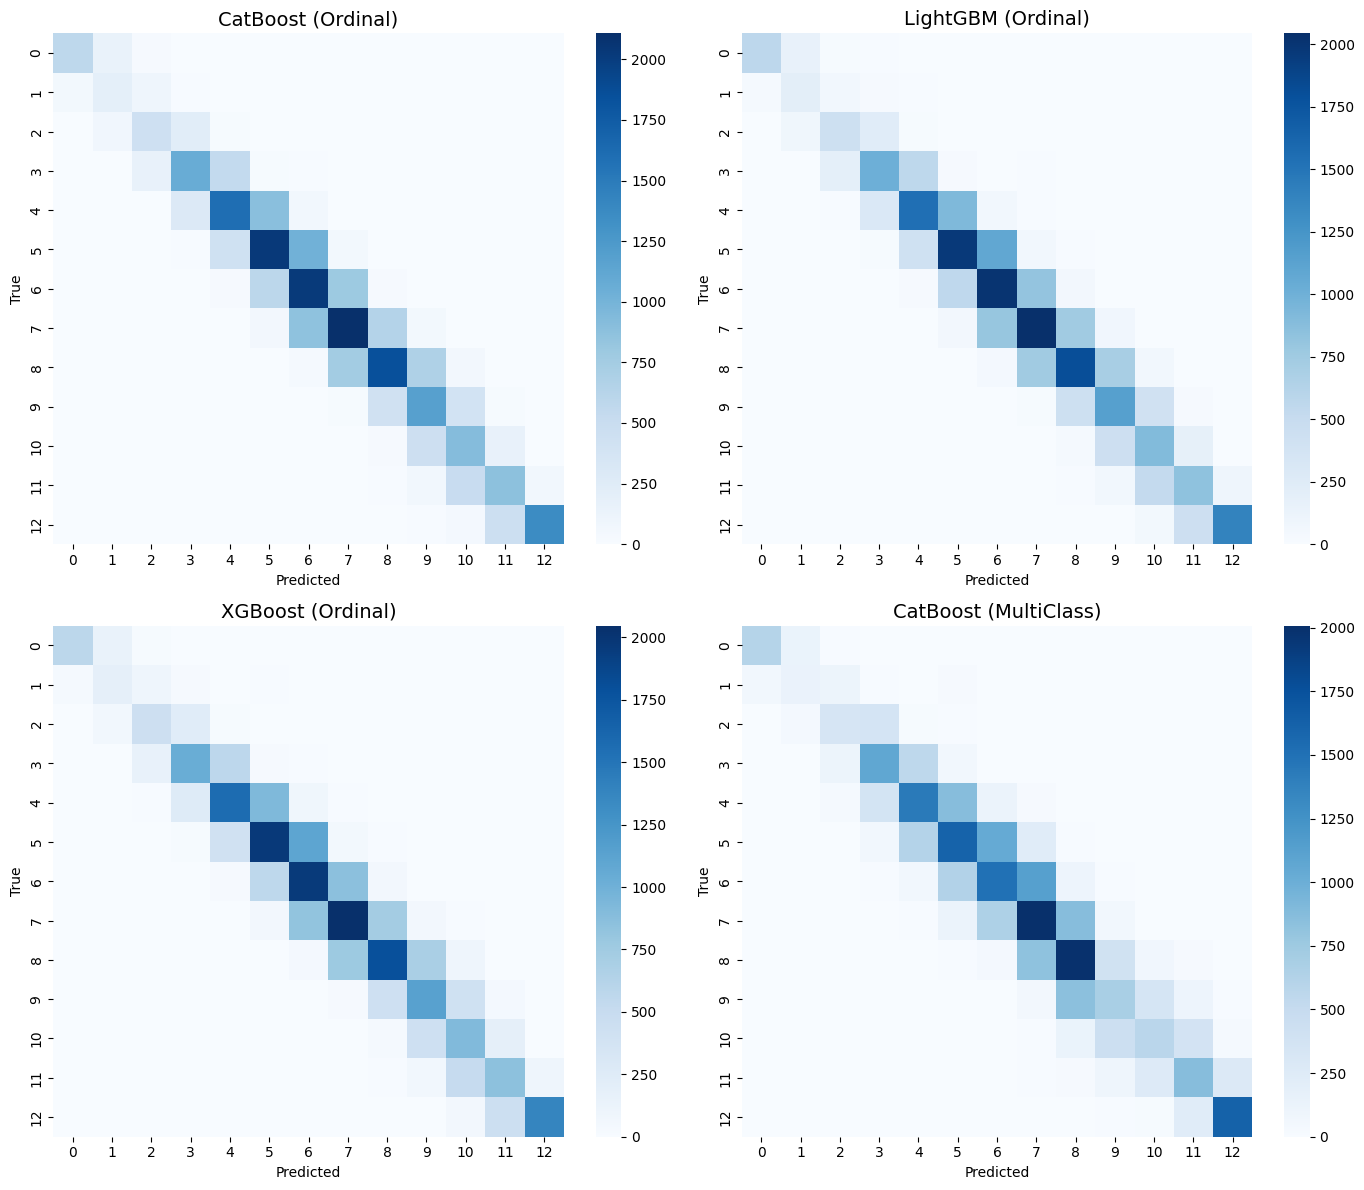

In [100]:
model_preds = {
    "CatBoost (Ordinal)": y_pred_cat,
    "LightGBM (Ordinal)": y_pred_lgb,
    "XGBoost (Ordinal)":  y_pred_xgb,
    "CatBoost (MultiClass)": y_pred_cat_multi
}

fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.flatten()

for ax, (name, preds) in zip(axes, model_preds.items()):
    cm = confusion_matrix(y_tree_test, preds)
    sns.heatmap(cm, cmap="Blues", annot=False, ax=ax)
    ax.set_title(name, fontsize=14)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("True")

plt.tight_layout()
plt.show()

# FEATURE SELECTION (Top-K Search)

In [101]:
importances = final_cat.get_feature_importance()
feat_names = X_train_red.columns

df_imp = pd.DataFrame({
    "feature": feat_names,
    "importance": importances
}).sort_values("importance", ascending=False)

df_imp

feature  importance
8      HSMainSystemEfficiency   36.589120
0                  UValueWall   17.200075
2                 UValueFloor   10.614794
1                  UValueRoof    5.490826
15      GroundFloorArea(sq m)    3.881973
12         DistributionLosses    3.787963
23             FirstFloorArea    2.794769
3                UValueWindow    2.530525
10             HSEffAdjFactor    2.199772
16                   WallArea    1.842843
29         WaterStorageVolume    1.543756
28      ElecImmersionInSummer    1.235469
31        InsulationThickness    1.166946
35               NoOfChimneys    0.989642
17                   RoofArea    0.828696
38           PermeabilityTest    0.803033
30             InsulationType    0.776713
18                  FloorArea    0.701877
24           FirstFloorHeight    0.675814
14        ManuLossFactorAvail    0.569580
5       ThermalBridgingFactor    0.488107
6         ThermalMassCategory    0.456264
22          GroundFloorHeight    0.403581
19                 WindowArea    0.363050
20                   DoorArea    0.297497
34           NoOfFansAndVents    0.240795
4                  UvalueDoor    0.234642
25    PredominantRoofTypeArea    0.202085
21            GroundFloorArea    0.185586
27       SolarHotWaterHeating    0.179132
37         NoOfSidesSheltered    0.169125
36              NoOfOpenFlues    0.145945
11        HSSupplHeatFraction    0.145040
39  PercentageDraughtStripped    0.075634
7         PredominantRoofType    0.050125
26       SuspendedWoodenFloor    0.043409
33                 DraftLobby    0.037242
13              StorageLosses    0.025568
9                 TGDLEdition    0.016593
32          VentilationMethod    0.016395

In [102]:
def evaluate_top_k(k):
    topk_feats = df_imp.head(k)["feature"].tolist()
    cat_topk = [c for c in cat_features_red if c in topk_feats]

    model = CatBoostRegressor(**best_cat_params_fixed)

    model.fit(
        X_train_red[topk_feats],
        y_tree_train,
        cat_features=cat_topk,
        eval_set=(X_test_red[topk_feats], y_tree_test),
        verbose=False
    )

    # Predict → round → ordinal
    y_pred_cont = model.predict(X_test_red[topk_feats])
    y_pred = np.round(y_pred_cont).clip(0, y_tree_train.max()).astype(int)

    qwk = cohen_kappa_score(y_tree_test, y_pred, weights="quadratic")
    acc = accuracy_score(y_tree_test, y_pred)

    return qwk, acc

In [103]:
results = []

feature_count = len(df_imp)

# Test K = all features down to 10
for k in range(feature_count, 9, -1):
    qwk, acc = evaluate_top_k(k)

    results.append({
        "K": k,
        "QWK": qwk,
        "Accuracy": acc,
        "Δ QWK vs Full": qwk - baseline_qwk,
        "Δ Accuracy vs Full": acc - baseline_acc
    })

results_df = pd.DataFrame(results)
results_df

K       QWK  Accuracy  Δ QWK vs Full  Δ Accuracy vs Full
0   40  0.968264  0.582086       0.000344            0.003995
1   39  0.968279  0.581510       0.000359            0.003419
2   38  0.968154  0.581618       0.000234            0.003527
3   37  0.968456  0.582842       0.000536            0.004750
4   36  0.968071  0.581222       0.000151            0.003131
5   35  0.968135  0.582266       0.000215            0.004174
6   34  0.967859  0.581150      -0.000062            0.003059
7   33  0.967834  0.580322      -0.000086            0.002231
8   32  0.966876  0.572297      -0.001044           -0.005794
9   31  0.966496  0.564740      -0.001424           -0.013351
10  30  0.965598  0.557795      -0.002322           -0.020297
11  29  0.965495  0.558335      -0.002425           -0.019757
12  28  0.965353  0.557759      -0.002567           -0.020333
13  27  0.965358  0.558442      -0.002562           -0.019649
14  26  0.965548  0.559450      -0.002372           -0.018641
15  25  0.964283  0.549410      -0.003637           -0.028681
16  24  0.962613  0.541025      -0.005308           -0.037066
17  23  0.961916  0.538974      -0.006005           -0.039118
18  22  0.961351  0.536275      -0.006570           -0.041817
19  21  0.961280  0.533288      -0.006641           -0.044804
20  20  0.961474  0.533684      -0.006447           -0.044408
21  19  0.960583  0.530049      -0.007337           -0.048042
22  18  0.960199  0.528681      -0.007721           -0.049410
23  17  0.958797  0.522492      -0.009123           -0.055600
24  16  0.957677  0.516626      -0.010244           -0.061465
25  15  0.956283  0.510688      -0.011637           -0.067403
26  14  0.953481  0.499280      -0.014439           -0.078811
27  13  0.949201  0.471858      -0.018719           -0.106233
28  12  0.943970  0.453649      -0.023951           -0.124442
29  11  0.943636  0.451814      -0.024284           -0.126278
30  10  0.943267  0.446992      -0.024653           -0.131100

In [104]:
best_row = results_df.loc[results_df["QWK"].idxmax()]
best_row

K                     37.000000
QWK                    0.968456
Accuracy               0.582842
Δ QWK vs Full          0.000536
Δ Accuracy vs Full     0.004750
Name: 3, dtype: float64

In [105]:
best_k = int(best_row["K"])
final_features = df_imp.head(best_k)["feature"].tolist()

print("FINAL SELECTED FEATURES:")
for f in final_features:
    print("-", f)


FINAL SELECTED FEATURES:
- HSMainSystemEfficiency
- UValueWall
- UValueFloor
- UValueRoof
- GroundFloorArea(sq m)
- DistributionLosses
- FirstFloorArea
- UValueWindow
- HSEffAdjFactor
- WallArea
- WaterStorageVolume
- ElecImmersionInSummer
- InsulationThickness
- NoOfChimneys
- RoofArea
- PermeabilityTest
- InsulationType
- FloorArea
- FirstFloorHeight
- ManuLossFactorAvail
- ThermalBridgingFactor
- ThermalMassCategory
- GroundFloorHeight
- WindowArea
- DoorArea
- NoOfFansAndVents
- UvalueDoor
- PredominantRoofTypeArea
- GroundFloorArea
- SolarHotWaterHeating
- NoOfSidesSheltered
- NoOfOpenFlues
- HSSupplHeatFraction
- PercentageDraughtStripped
- PredominantRoofType
- SuspendedWoodenFloor
- DraftLobby


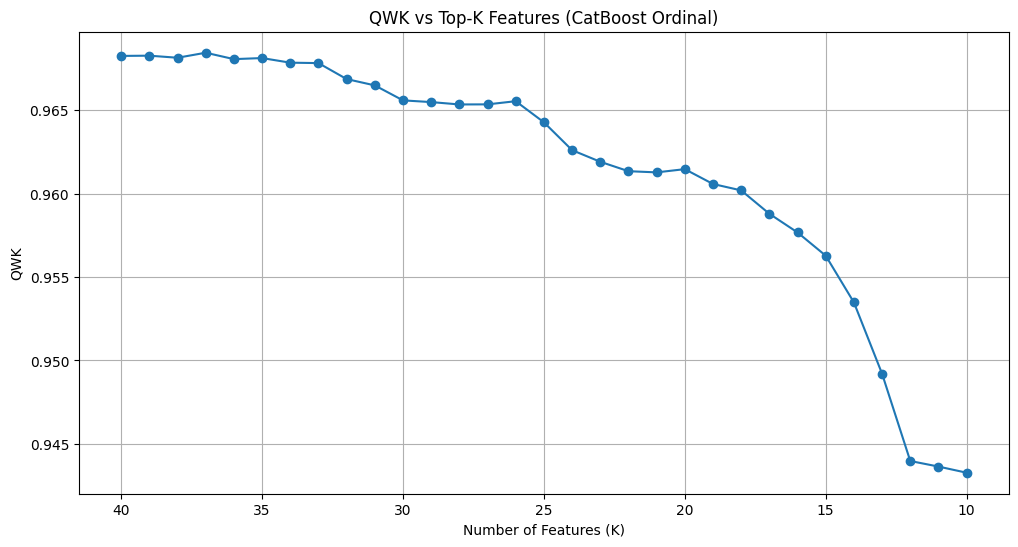

In [106]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(results_df["K"], results_df["QWK"], marker="o")
plt.xlabel("Number of Features (K)")
plt.ylabel("QWK")
plt.title("QWK vs Top-K Features (CatBoost Ordinal)")
plt.gca().invert_xaxis()
plt.grid(True)
plt.show()


# FINAL EVALUATION OF MODELS AFTER TUNING AND FEATURE SELECTION

In [109]:
final_features = df_imp.head(best_k)["feature"].tolist()
cat_final = [c for c in cat_features_red if c in final_features]

final_cat_k = CatBoostRegressor(**best_cat_params_fixed)

final_cat_k.fit(
    X_train_red[final_features],
    y_tree_train,
    cat_features=cat_final,
    eval_set=(X_test_red[final_features], y_tree_test),
    verbose=False
)

# Predictions with best-K model
y_pred_k_cont = final_cat_k.predict(X_test_red[final_features])
y_pred_k = np.round(y_pred_k_cont).clip(0, y_tree_train.max()).astype(int)


In [111]:
final_lgbm = lgb.LGBMRegressor(**best_lgbm_params_fixed)

final_lgbm.fit(
    X_train_red[final_features],
    y_tree_train,
    eval_set=[(X_test_red[final_features], y_tree_test)],
    callbacks=[
        lgb.early_stopping(stopping_rounds=100),
        lgb.log_evaluation(period=0)
    ]
)

# Predict and round to ordinal classes
y_pred_lgb_cont = final_lgbm.predict(X_test_red[final_features])
y_pred_lgb = np.round(y_pred_lgb_cont).clip(0, y_tree_train.max()).astype(int)


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[2423]	valid_0's rmse: 0.701172


In [116]:
from xgboost import XGBRegressor

final_xgb = XGBRegressor(**best_xgb_params_fixed, enable_categorical=True)

final_xgb.fit(
    X_train_red[final_features],
    y_tree_train,
    eval_set=[(X_test_red[final_features], y_tree_test)],
    verbose=False
)

# Predict and round
y_pred_xgb_cont = final_xgb.predict(X_test_red[final_features])
y_pred_xgb = np.round(y_pred_xgb_cont).clip(0, y_tree_train.max()).astype(int)


In [118]:
# Filter categorical features for final CatBoost Multiclass
cat_final_multi = [c for c in cat_features_red if c in final_features]

final_cat_multi = CatBoostClassifier(
    **best_cat_multi_params_fixed,

)

final_cat_multi.fit(
    X_train_red[final_features],
    y_tree_train,
    cat_features=cat_final_multi,
    eval_set=(X_test_red[final_features], y_tree_test),
    verbose=False
)

# Predict and convert to integers
y_pred_multi = final_cat_multi.predict(X_test_red[final_features]).astype(int)


In [119]:
final_qwk_catord = cohen_kappa_score(y_tree_test, y_pred_k, weights="quadratic")
final_acc_catord = accuracy_score(y_tree_test, y_pred_k)

final_qwk_lgb = cohen_kappa_score(y_tree_test, y_pred_lgb, weights="quadratic")
final_acc_lgb = accuracy_score(y_tree_test, y_pred_lgb)

final_qwk_xgb = cohen_kappa_score(y_tree_test, y_pred_xgb, weights="quadratic")
final_acc_xgb = accuracy_score(y_tree_test, y_pred_xgb)

final_qwk_multi = cohen_kappa_score(y_tree_test, y_pred_multi, weights="quadratic")
final_acc_multi = accuracy_score(y_tree_test, y_pred_multi)

In [124]:
final_results = pd.DataFrame({
    "Model": ["CatBoost Ordinal", "LightGBM", "XGBoost", "CatBoost Multiclass"],
    "QWK": [final_qwk_catord, final_qwk_lgb, final_qwk_xgb, final_qwk_multi],
    "Accuracy": [final_acc_catord, final_acc_lgb, final_acc_xgb, final_acc_multi]
})

final_results


Model       QWK  Accuracy
0     CatBoost Ordinal  0.968456  0.582842
1             LightGBM  0.965972  0.568483
2              XGBoost  0.965393  0.567439
3  CatBoost Multiclass  0.953180  0.520836

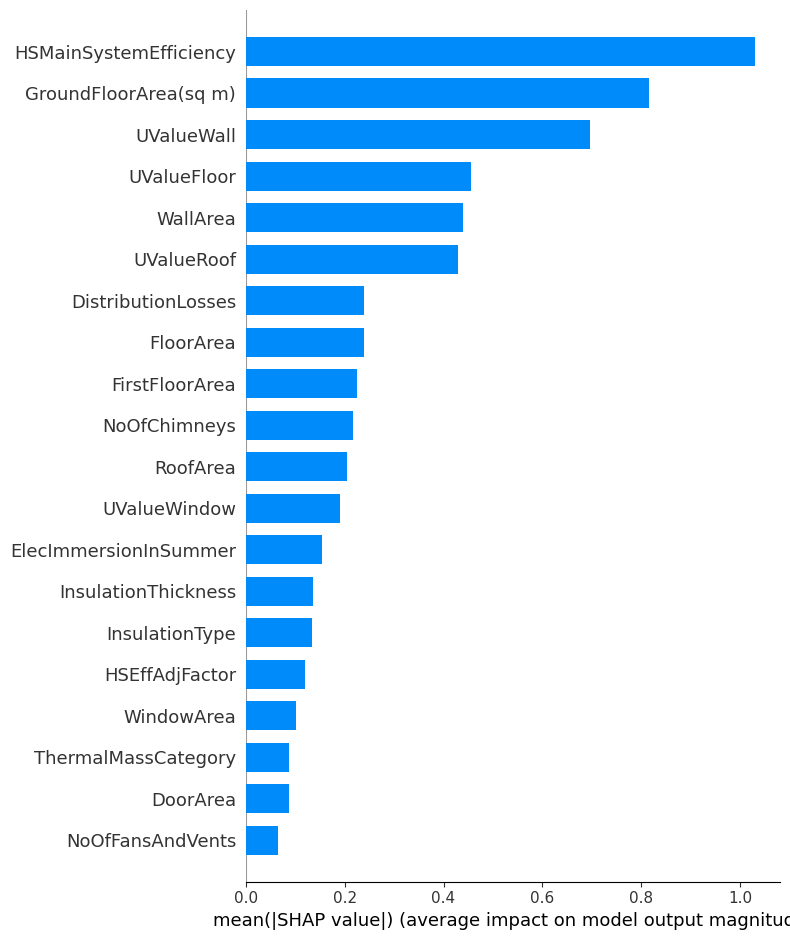

In [122]:
import shap
shap.initjs()

explainer = shap.TreeExplainer(final_cat_k)
shap_values = explainer.shap_values(X_test_red[final_features])

# Bar Plot (global importance)
shap.summary_plot(shap_values, X_test_red[final_features], plot_type="bar")



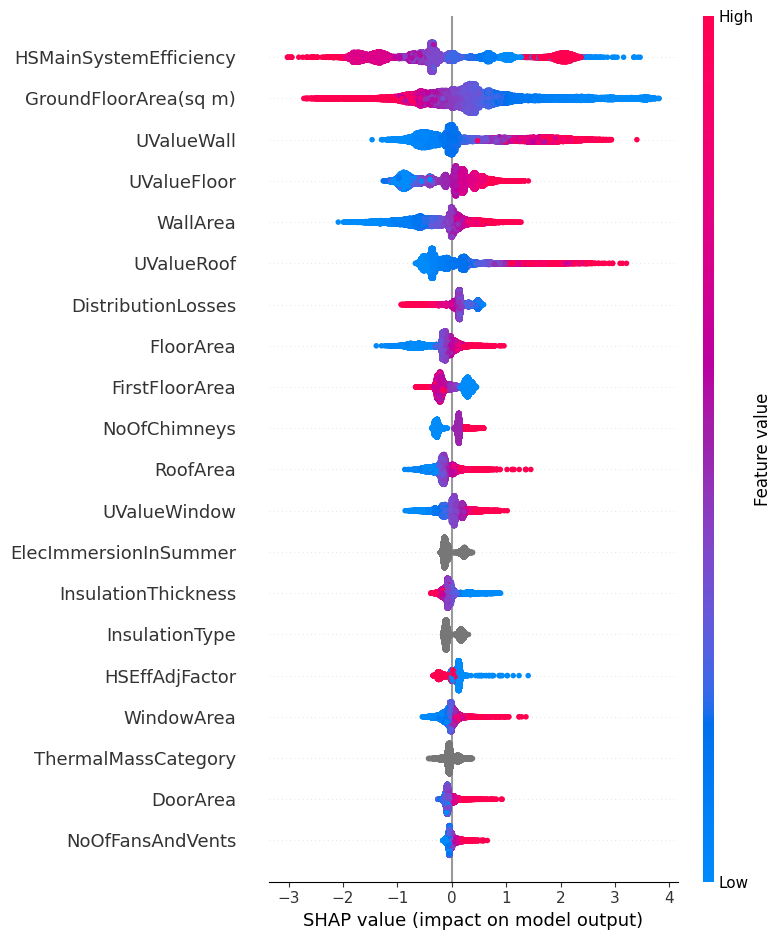

In [123]:

# Beeswarm Plot (detailed)
shap.summary_plot(shap_values, X_test_red[final_features])

In [134]:
baseline_data = {
    "Model": [
        "CatBoost Ordinal (Baseline)",
        "LightGBM Ordinal (Baseline)",
        "XGBoost Ordinal (Baseline)",
        "CatBoost Multiclass (Baseline)"
    ],
    "QWK": [0.9545, 0.9679, 0.9644, 0.9480],
    "Accuracy": [0.4552, 0.5781, 0.5618, 0.4987]
}


df_baseline = pd.DataFrame(baseline_data)
df_tuned = pd.DataFrame(final_results)
df_combined = pd.concat([df_baseline, final_results], axis=0)
df_combined


Model       QWK  Accuracy
0     CatBoost Ordinal (Baseline)  0.954500  0.455200
1     LightGBM Ordinal (Baseline)  0.967900  0.578100
2      XGBoost Ordinal (Baseline)  0.964400  0.561800
3  CatBoost Multiclass (Baseline)  0.948000  0.498700
0                CatBoost Ordinal  0.968456  0.582842
1                        LightGBM  0.965972  0.568483
2                         XGBoost  0.965393  0.567439
3             CatBoost Multiclass  0.953180  0.520836

/tmp/ipython-input-2582275848.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


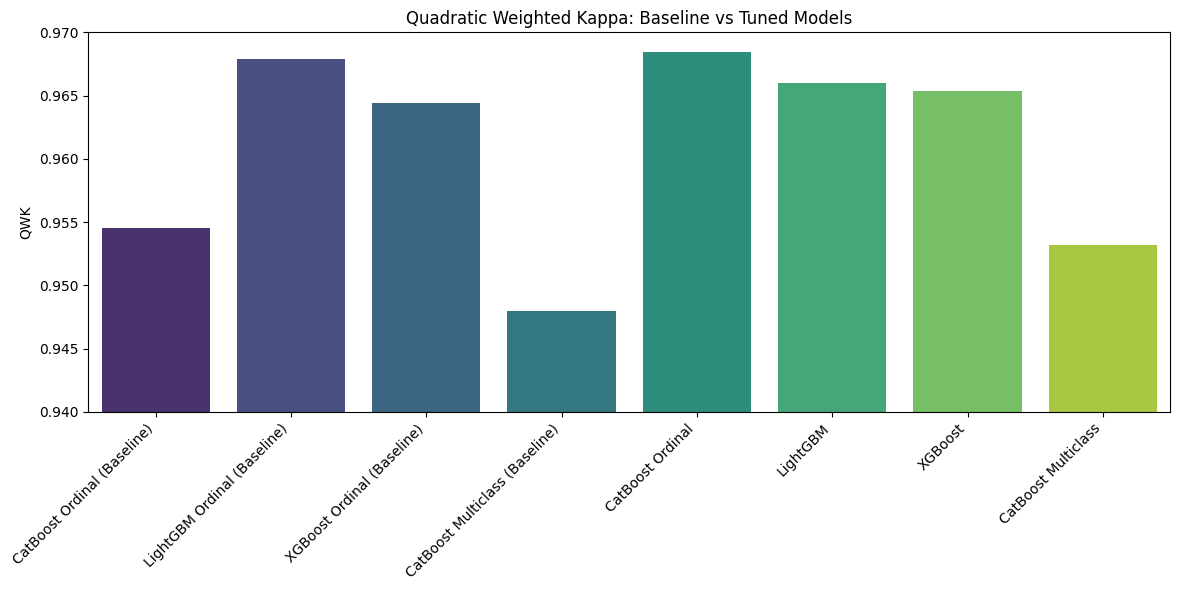

In [133]:
plt.figure(figsize=(12,6))
sns.barplot(
    data=df_combined,
    x="Model",
    y="QWK",
    palette="viridis"
)
plt.xticks(rotation=45, ha="right")
plt.ylim(0.94, 0.97)
plt.title("Quadratic Weighted Kappa: Baseline vs Tuned Models")
plt.ylabel("QWK")
plt.xlabel("")
plt.tight_layout()
plt.show()

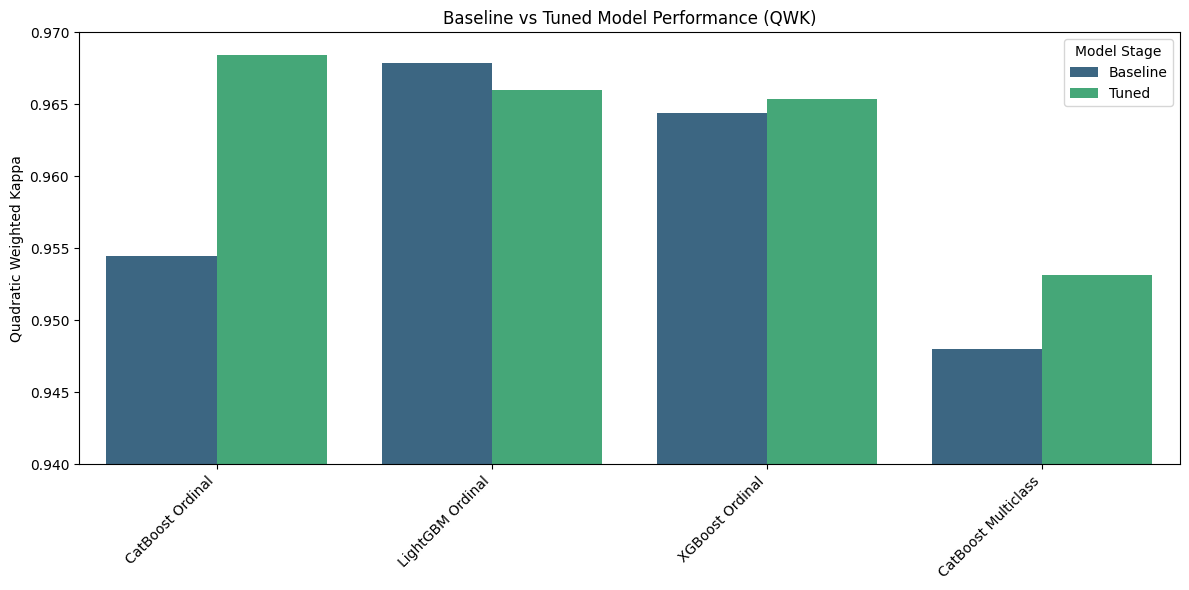

In [137]:
# Build a tidy DataFrame for grouped plotting
df_compare = pd.DataFrame({
    "Model": [
        "CatBoost Ordinal", "CatBoost Ordinal",
        "LightGBM Ordinal", "LightGBM Ordinal",
        "XGBoost Ordinal", "XGBoost Ordinal",
        "CatBoost Multiclass", "CatBoost Multiclass"
    ],
    "Stage": [
        "Baseline", "Tuned",
        "Baseline", "Tuned",
        "Baseline", "Tuned",
        "Baseline", "Tuned"
    ],
    "QWK": [
        0.9545, 0.968456,
        0.9679, 0.965972,
        0.9644, 0.965393,
        0.9480, 0.953180
    ]
})

plt.figure(figsize=(12, 6))

sns.barplot(
    data=df_compare,
    x="Model",
    y="QWK",
    hue="Stage",
    palette="viridis"
)

plt.ylim(0.94, 0.97)  # <-- Zoomed Y-axis to highlight differences
plt.title("Baseline vs Tuned Model Performance (QWK)")
plt.ylabel("Quadratic Weighted Kappa")
plt.xlabel("")
plt.xticks(rotation=45, ha="right")

plt.legend(title="Model Stage")
plt.tight_layout()
plt.show()
